**Первичный анализ данных**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
data = pd.read_csv("финальный_датасет (1).csv", sep=',', encoding='utf-8')

In [ ]:
data

,title,year,duration,age_limit,movie_id,country,genres,revenue,budget,rating
0,The Godfather Part II,1974,202,R,tt0071562,United States of America,"Drama, Crime",102600000.0,13000000.0,8.7855
1,Chinatown,1974,130,R,tt0071315,United States of America,"Crime, Drama, Mystery, Thriller",30000000.0,6000000.0,8.0085
2,The Texas Chain Saw Massacre,1974,83,R,tt0072271,United States of America,Horror,30922680.0,140000.0,7.3415
3,Young Frankenstein,1974,106,PG,tt0072431,United States of America,Comedy,86273333.0,2800000.0,7.9310
4,Blazing Saddles,1974,93,R,tt0071230,United States of America,"Western, Comedy",119500000.0,2600000.0,7.4720
...,...,...,...,...,...,...,...,...,...,...
9905,Role Play,2024,100,R,tt12964320,"France, Germany, United States of America","Action, Comedy, Romance",576455.0,NaN,5.7230
9906,How to Make Millions Before Grandma Dies,2024,125,TV-PG,tt31392609,Thailand,"Comedy, Drama, Family",5952771.0,NaN,7.9000
9907,The Killers Game,2024,104,R,tt0327785,"United States of America, United Kingdom, Spai...","Action, Comedy, Thriller",5928351.0,30000000.0,6.0875
9908,The Assessment,2024,114,R,tt32768323,"United Kingdom, Germany, United States","Drama, Sci-Fi",279328.0,8000000.0,6.6000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9910 entries, 0 to 9909
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      9910 non-null   object 
 1   year       9910 non-null   int64  
 2   duration   9910 non-null   int64  
 3   age_limit  9413 non-null   object 
 4   movie_id   9910 non-null   object 
 5   country    9910 non-null   object 
 6   genres     9910 non-null   object 
 7   revenue    8066 non-null   object 
 8   budget     7231 non-null   float64
 9   rating     9910 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 774.3+ KB


In [ ]:
print("Размеры датасета: ", data.shape)
print("Колонки датасета: ", data.columns)

Размеры датасета:  (9910, 10)
Колонки датасета:  Index(['title', 'year', 'duration', 'age_limit', 'movie_id', 'country',
       'genres', 'revenue', 'budget', 'rating'],
      dtype='object')


In [ ]:
data.rename(columns={'age_rating': 'age_limit'}, inplace=True)

In [ ]:
data.isnull().sum()

,0
title,0
year,0
duration,0
age_limit,497
movie_id,0
country,0
genres,0
revenue,1844
budget,2679
rating,0


**Корреляционный анализ**

Перед началом всех анализов стоит рассмотреть как различные признаки связаны друг с другом

In [ ]:
age_limit_mapping = {
    'G': 0,
    'PG': 7,
    'PG-13': 13,
    'R': 17,
    'NC-17': 18,
    'X': 18,
    'TV-G': 0,
    'TV-PG': 7,
    'TV-14': 14,
    'TV-MA': 17,
    'TV-Y': 0,
    '13+': 13,
    '16+': 16,
    '18+': 18,
    '12': 12,
    'E10+': 10,
    'Not Rated': np.nan,
    'Unrated': np.nan,
    'Approved': np.nan,
}

data['age_rating'] = data['age_limit'].map(age_limit_mapping)
print(data['age_rating'].unique())
print(data.head(5))

[17.  7.  0. nan 18. 13. 12. 14. 16. 10.]
                          title  year  duration age_limit   movie_id  \
0         The Godfather Part II  1974       202         R  tt0071562   
1                     Chinatown  1974       130         R  tt0071315   
2  The Texas Chain Saw Massacre  1974        83         R  tt0072271   
3            Young Frankenstein  1974       106        PG  tt0072431   
4               Blazing Saddles  1974        93         R  tt0071230   

                    country                           genres      revenue  \
0  United States of America                     Drama, Crime  102600000.0   
1  United States of America  Crime, Drama, Mystery, Thriller   30000000.0   
2  United States of America                           Horror   30922680.0   
3  United States of America                           Comedy   86273333.0   
4  United States of America                  Western, Comedy  119500000.0   

       budget  rating  age_rating  
0  13000000.0  8.7855     

In [ ]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data_filtered = data[
    (data['budget'] > 0) &
    (data['revenue'] > 0)
]

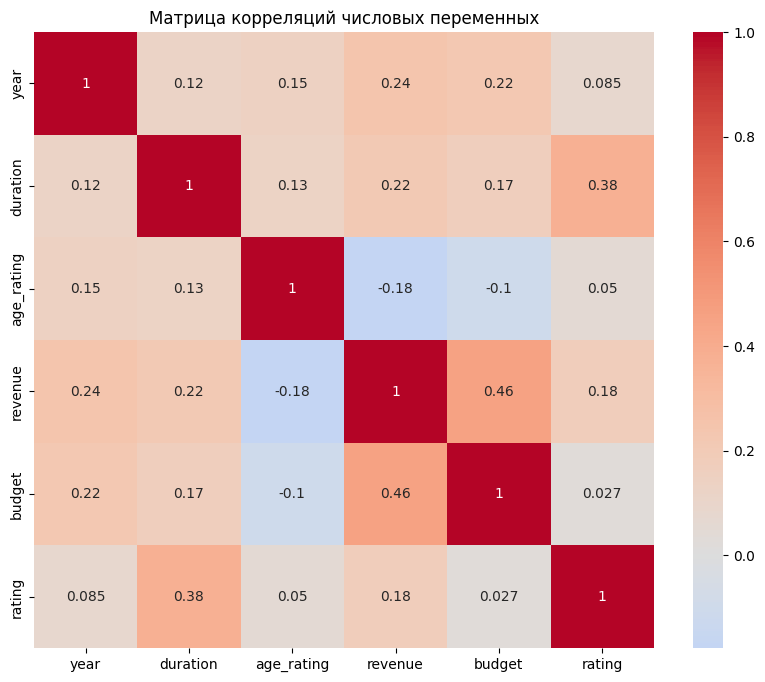

In [ ]:
numeric_cols = ['year', 'duration','age_rating', 'revenue', 'budget', 'rating']
plt.figure(figsize=(10, 8))
numeric_data = data_filtered[numeric_cols].corr()
sns.heatmap(numeric_data, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых переменных')
plt.show()

Рассмотрим попарные корреляции для трех типов пар:
*   Все корреляции с целевой переменной. В нашем анализе такой является rating
*   Сильная (>0.3). Такие пары - rating и duration, но мы ее расмотрим в пункте 1 и budget и revenue
*   Интересные или необычные. Такими мы выявили - year-revenue, duration-budget, duration-revenue age_limit-revenue



In [19]:
categorical_cols = [ 'country', 'genres']
print("Анализ категориальных признаков")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Уникальных значений: {data[col].nunique()}")
    print(f"Топ-5: {data[col].value_counts().head(5).to_dict()}")

Анализ категориальных признаков

country:
Уникальных значений: 1036
Топ-5: {'United States of America': 4366, 'United States': 642, 'United Kingdom, United States of America': 411, 'India': 398, 'United Kingdom': 277}

genres:
Уникальных значений: 1899
Топ-5: {'Drama': 546, 'Comedy': 487, 'Comedy, Drama': 329, 'Drama, Romance': 318, 'Comedy, Drama, Romance': 248}


*Корреляции с целевой переменной*

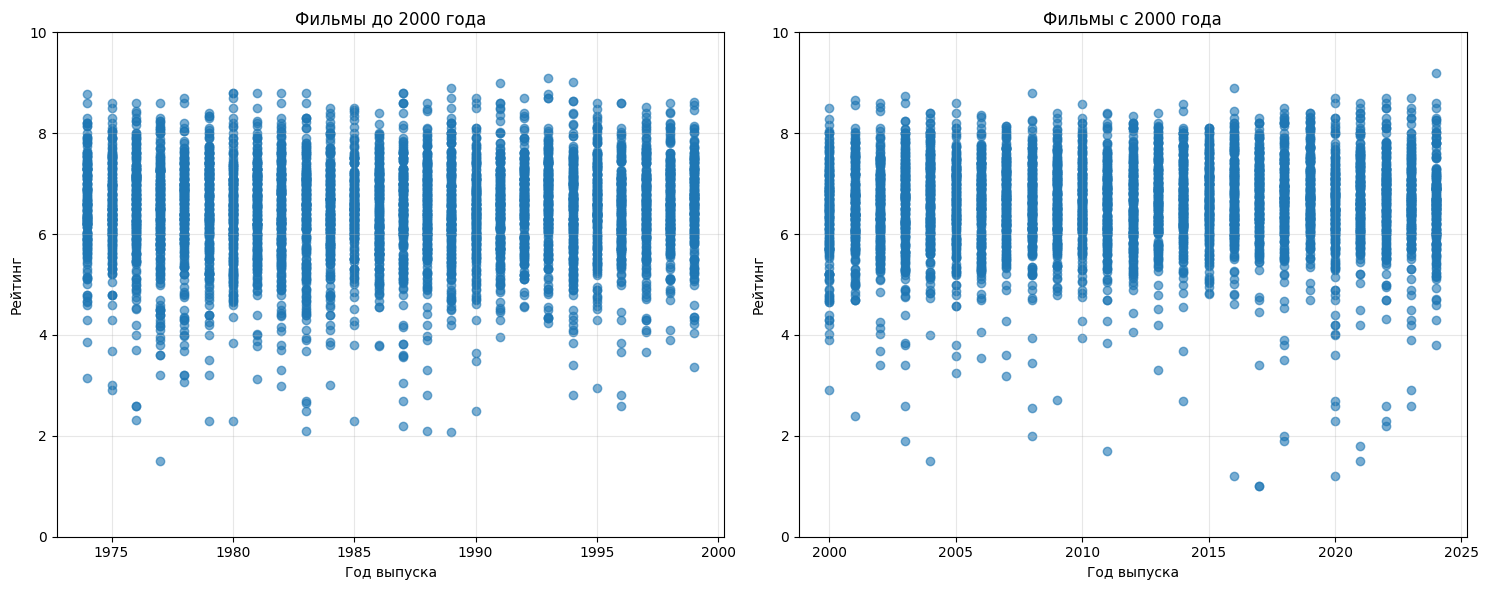

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

data_before_2000 = data[data['year'] < 2000]
ax1.scatter(data_before_2000['year'], data_before_2000['rating'], alpha=0.6)
ax1.set_xlabel('Год выпуска')
ax1.set_ylabel('Рейтинг')
ax1.set_title('Фильмы до 2000 года')
ax1.grid(alpha=0.3)
ax1.set_ylim(0, 10)

data_after_2000 = data[data['year'] >= 2000]
ax2.scatter(data_after_2000['year'], data_after_2000['rating'], alpha=0.6)
ax2.set_xlabel('Год выпуска')
ax2.set_ylabel('Рейтинг')
ax2.set_title('Фильмы с 2000 года')
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 10)

plt.tight_layout()
plt.show()

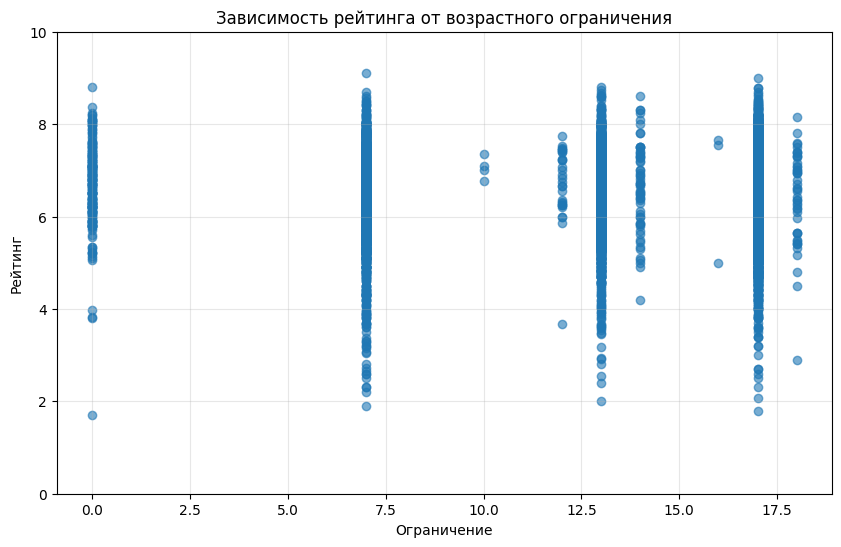

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age_rating'], data['rating'], alpha=0.6)
plt.xlabel('Ограничение')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от возрастного ограничения')
plt.grid(alpha=0.3)
plt.ylim(0, 10)
plt.show()


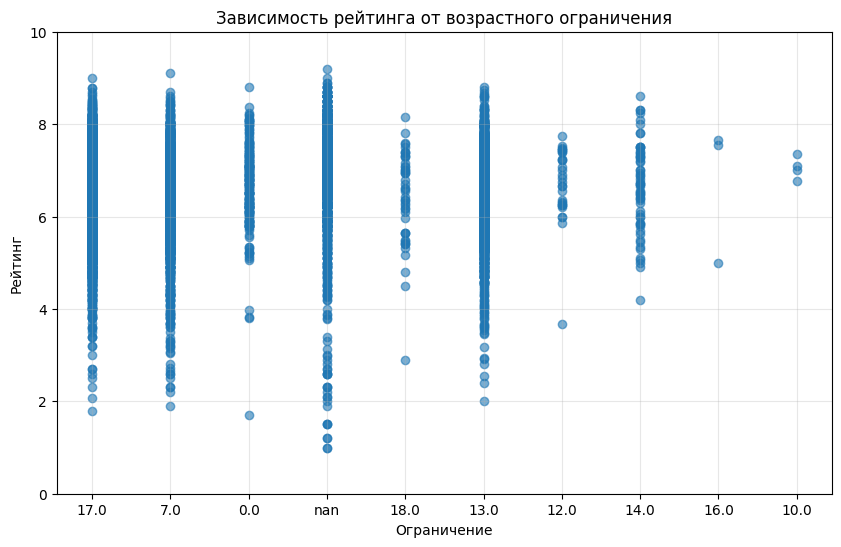

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age_rating'].astype(str), data['rating'], alpha=0.6)
plt.xlabel('Ограничение')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от возрастного ограничения')
plt.grid(alpha=0.3)
plt.ylim(0, 10)
plt.show()

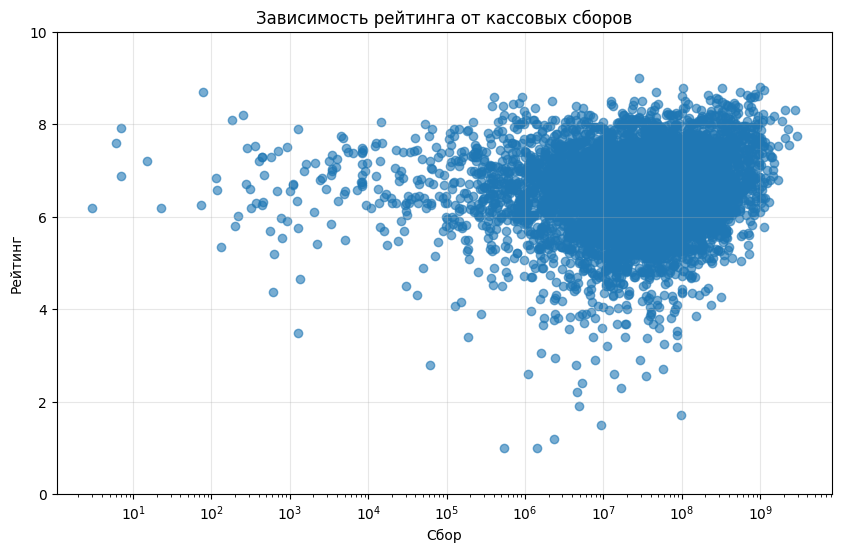

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['revenue'], data_filtered['rating'], alpha=0.6)
plt.xlabel('Сбор')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от кассовых сборов')
plt.grid(alpha=0.3)
plt.xscale('log')
plt.ylim(0, 10)
plt.show()

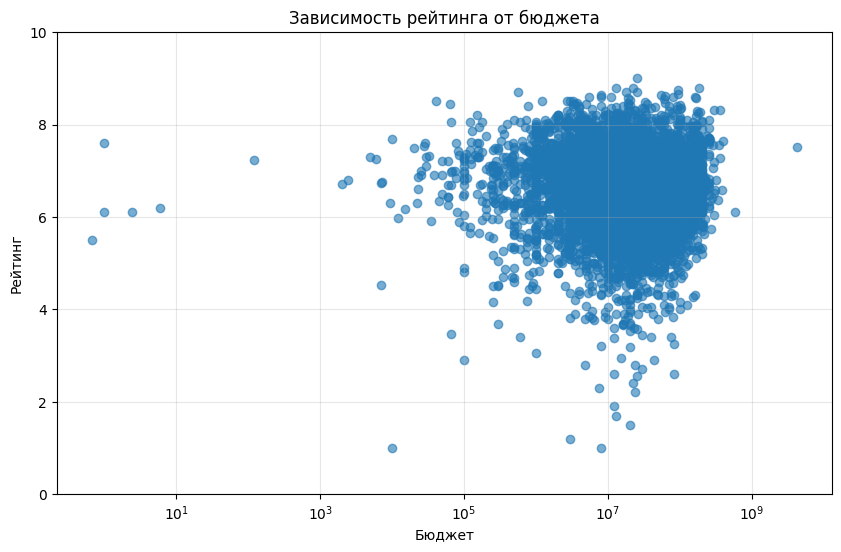

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['budget'], data_filtered['rating'], alpha=0.6)
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от бюджета')
plt.grid(alpha=0.3)
plt.xscale('log')
plt.ylim(0, 10)
plt.show()

*Сильные*

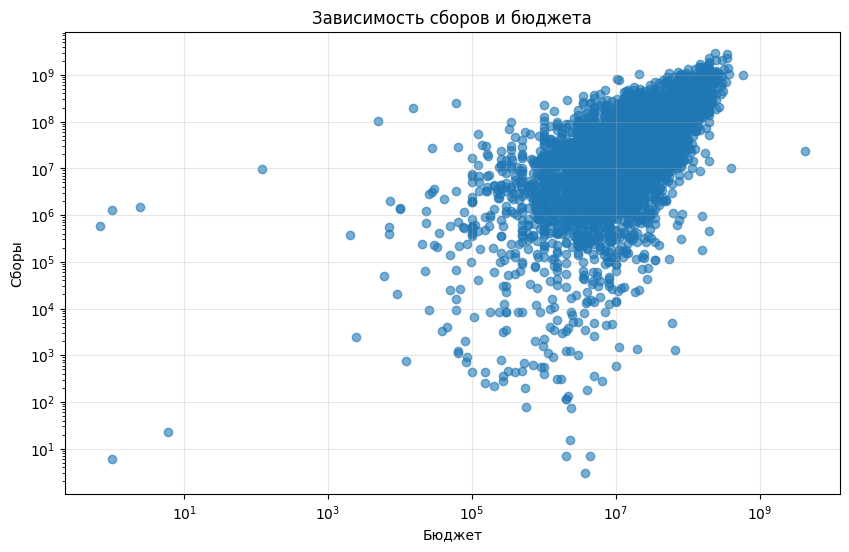

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['budget'], data_filtered['revenue'], alpha=0.6)
plt.xlabel('Бюджет')
plt.ylabel('Cборы')
plt.title('Зависимость сборов и бюджета')
plt.grid(alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

*Другие корреляции*


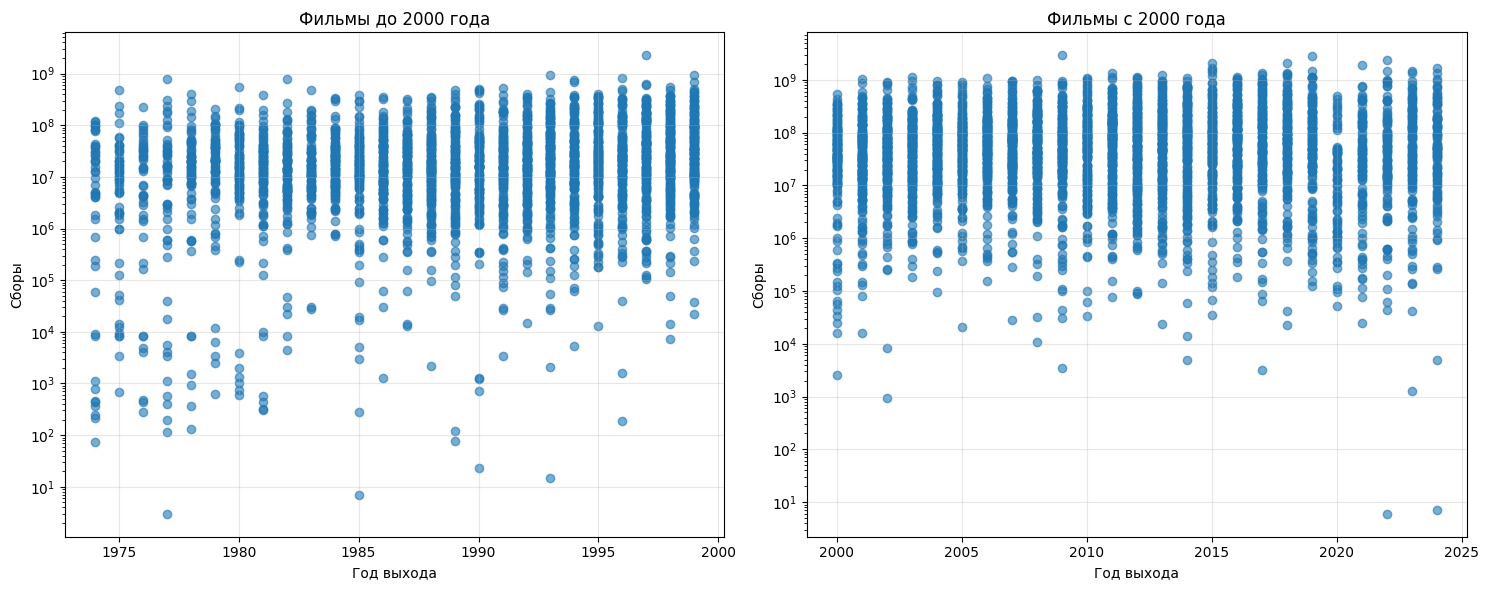

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

data_before_2000 = data_filtered[data_filtered['year'] < 2000]
ax1.scatter(data_before_2000['year'], data_before_2000['revenue'], alpha=0.6)
ax1.set_xlabel('Год выхода')
ax1.set_ylabel('Сборы')
ax1.set_title('Фильмы до 2000 года')
ax1.grid(alpha=0.3)
ax1.set_yscale('log')

data_after_2000 = data_filtered[data_filtered['year'] >= 2000]
ax2.scatter(data_after_2000['year'], data_after_2000['revenue'], alpha=0.6)
ax2.set_xlabel('Год выхода')
ax2.set_ylabel('Сборы')
ax2.set_title('Фильмы с 2000 года')
ax2.grid(alpha=0.3)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

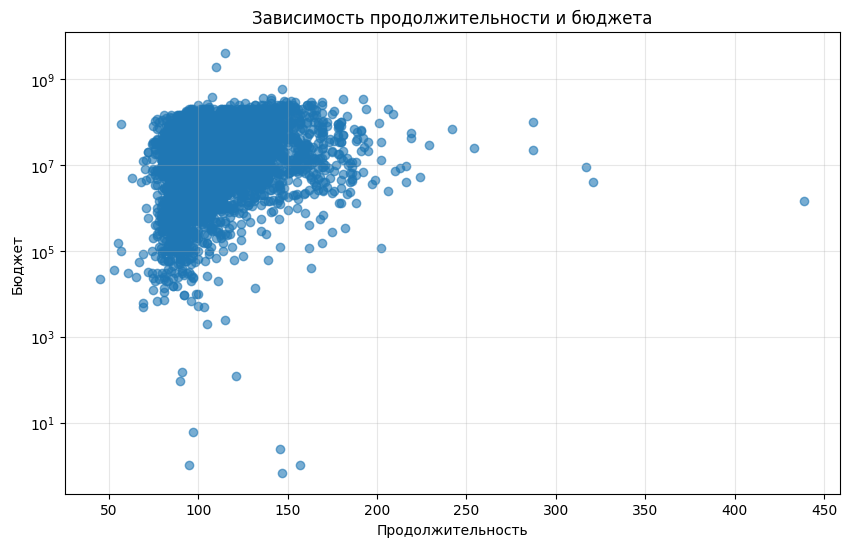

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['budget'], alpha=0.6)
plt.xlabel('Продолжительность')
plt.ylabel('Бюджет')
plt.title('Зависимость продолжительности и бюджета')
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()

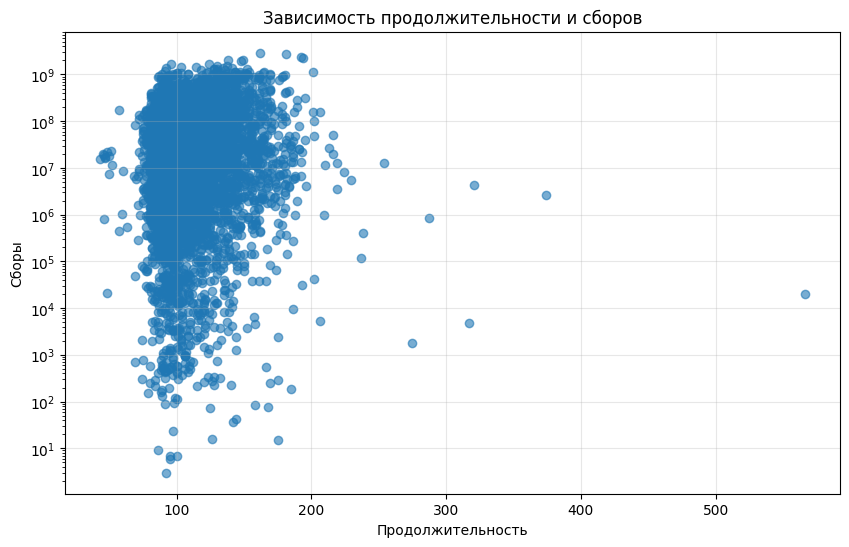

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['revenue'], alpha=0.6)
plt.xlabel('Продолжительность')
plt.ylabel('Сборы')
plt.title('Зависимость продолжительности и сборов')
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()

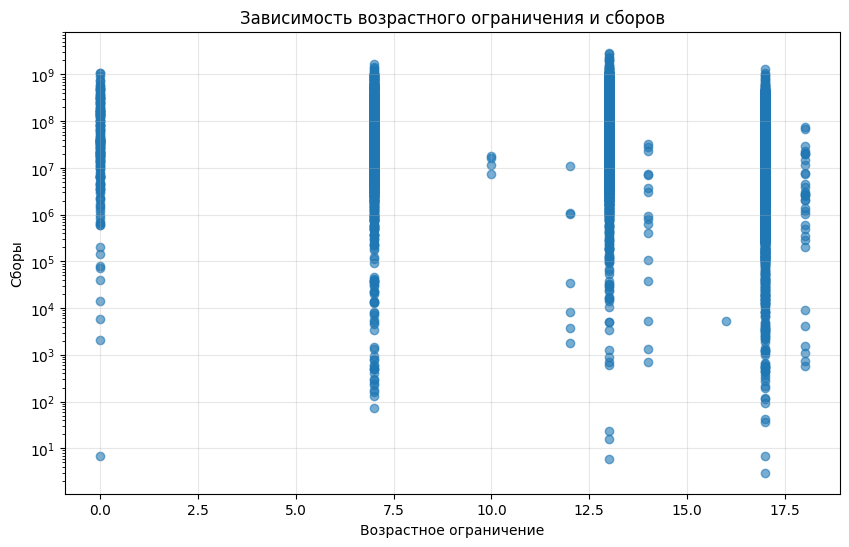

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age_rating'], data['revenue'], alpha=0.6)
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы')
plt.title('Зависимость возрастного ограничения и сборов')
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()

**Анализ выбросов и аномалий**

Дальше рассмотрим колличество выбросов в различных числовых переменных

*Анализ выбросов числовых переменных*

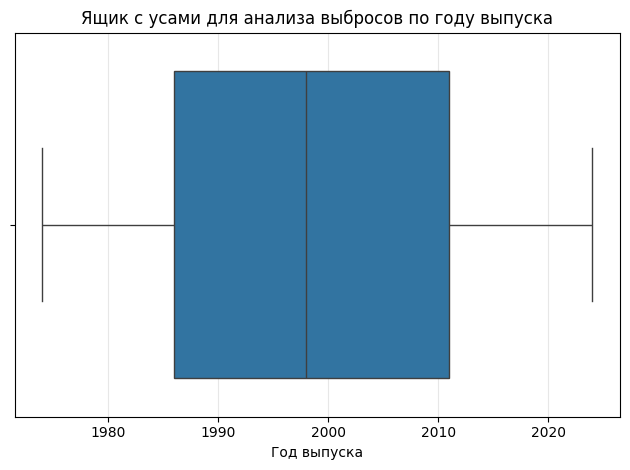

In [30]:
sns.boxplot(data, x='year')
plt.xlabel('Год выпуска')
plt.title('Ящик с усами для анализа выбросов по году выпуска')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

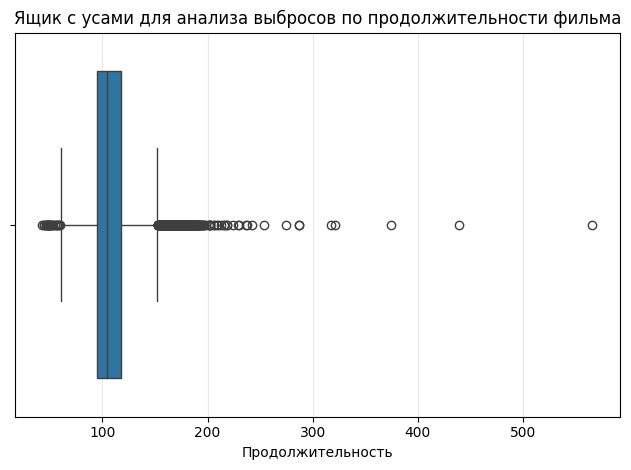

In [31]:
sns.boxplot(data, x='duration')
plt.xlabel('Продолжительность')
plt.title('Ящик с усами для анализа выбросов по продолжительности фильма')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

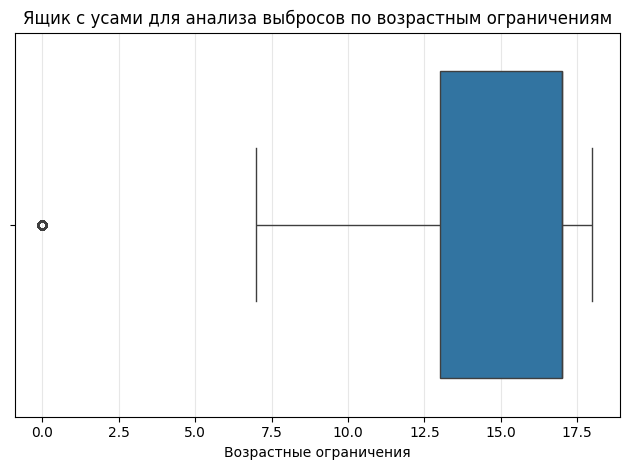

In [32]:
sns.boxplot(data, x='age_rating')
plt.xlabel('Возрастные ограничения')
plt.title('Ящик с усами для анализа выбросов по возрастным ограничениям')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

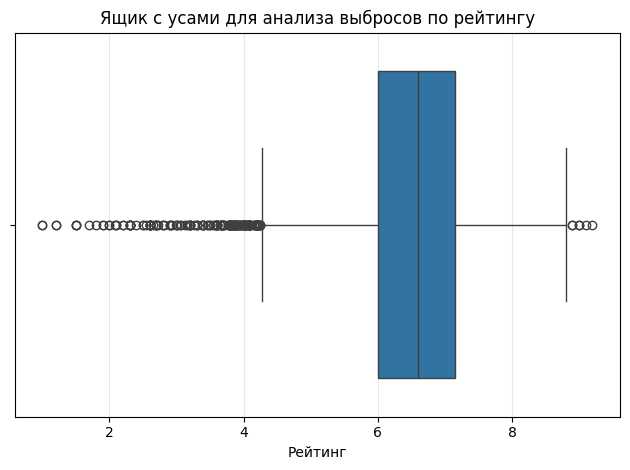

In [33]:
sns.boxplot(data, x='rating')
plt.xlabel('Рейтинг')
plt.title('Ящик с усами для анализа выбросов по рейтингу')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ целевой переменной**

In [34]:
mean = np.mean(data['rating'])
print(f"Среднее арифметическое: {mean:.2f}")

std_rating = data['rating'].std()
print(f"Стандартное отклонение: {std_rating:.2f}")

mn = data['rating'].min()
print("Минимальная оценка пользователей:", mn)

mx = data['rating'].max()
print("Максимальная оценка пользователей:", mx)

rating_median = data['rating'].median()
print("Медиана оценки пользователей:", rating_median)

Среднее арифметическое: 6.53
Стандартное отклонение: 0.93
Минимальная оценка пользователей: 1.0
Максимальная оценка пользователей: 9.2
Медиана оценки пользователей: 6.6


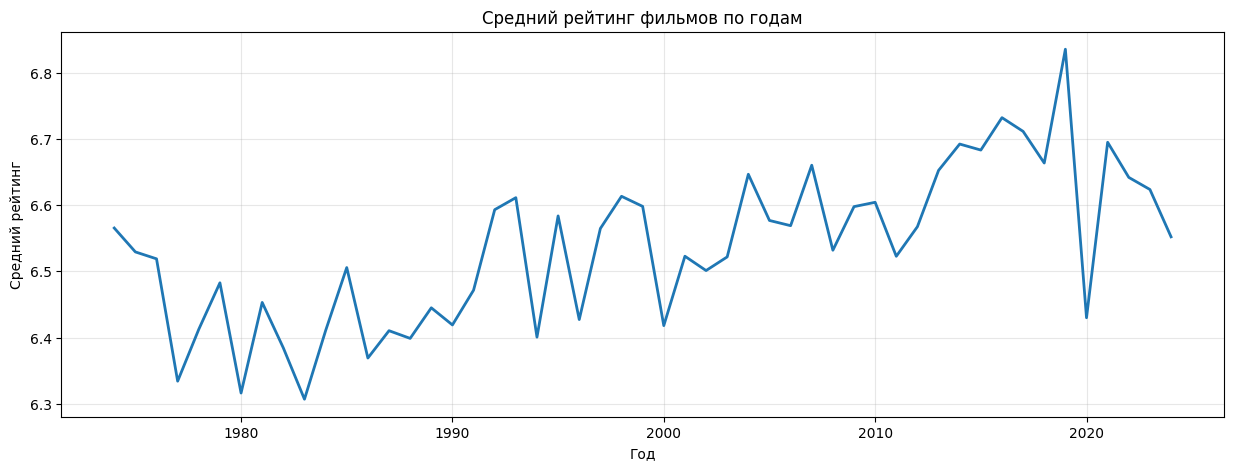

In [35]:
plt.figure(figsize=(15, 5))
yearly_rating = data.groupby('year')['rating'].mean()
plt.plot(yearly_rating.index, yearly_rating.values, linewidth=2)
plt.title('Средний рейтинг фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')
plt.grid(True, alpha=0.3)


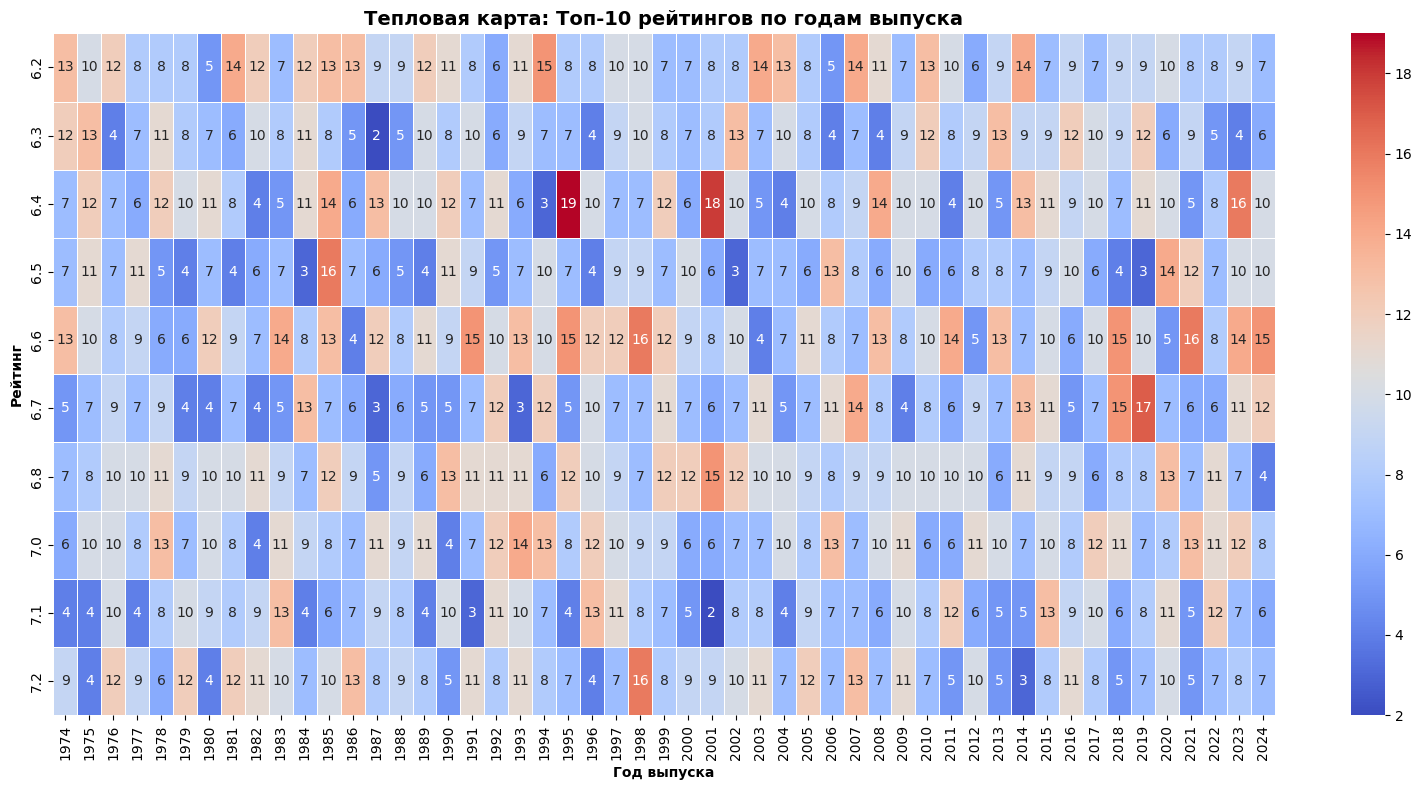

In [36]:
plt.figure(figsize=(16, 8))

data['rating_rounded'] = data['rating'].round(1)
level_counts = data['rating_rounded'].value_counts().reset_index()
level_counts.columns = ['rating_rounded', 'count']

top_levels = level_counts.head(10)['rating_rounded']
filtered_data = data[data['rating_rounded'].isin(top_levels)]

table = pd.crosstab(filtered_data['rating_rounded'], filtered_data['year'])

sns.heatmap(data=table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта: Топ-10 рейтингов по годам выпуска', fontsize=14, fontweight='bold')
plt.xlabel('Год выпуска', fontweight='bold')
plt.ylabel('Рейтинг', fontweight='bold')
plt.tight_layout()
plt.show()
data = data.drop('rating_rounded', axis=1)

In [37]:
countries_expanded = data.assign(
    country_split=data['country'].str.split(', ')
).explode('country_split')

country_ratings = countries_expanded.groupby('country_split').agg({
    'rating': 'mean',
    'title': 'count'
}).reset_index()

country_ratings.columns = ['country', 'rating', 'movie_count']

fig = px.choropleth(
    country_ratings,
    locations='country',
    locationmode='country names',
    color='rating',
    hover_name='country',
    hover_data={'rating': ':.2f', 'movie_count': True},
    color_continuous_scale='RdYlGn',
    range_color=[0, 10],
    title='Средний рейтинг фильмов по странам',
    labels={'rating': 'Средний рейтинг', 'movie_count': 'Количество фильмов'}
)

fig.show()

In [38]:
split_genres = data['genres'].str.split(', ')
exploded_genres = split_genres.explode()
genres_df = exploded_genres.to_frame(name='genre')
genres_df['rating'] = data['rating']
genre_stats = genres_df.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
)
genre_stats = genre_stats.sort_values('mean_rating', ascending=False)

fig = px.bar(
    genre_stats,
    x=genre_stats.index,
    y='mean_rating',
    color='movie_count',
    title='жанры по рейтингу',
    labels={'mean_rating': 'cредний рейтинг', 'index': 'Жанр', 'movie_count': 'Количество фильмов'}
)

fig.update_layout(
    yaxis_range=[0, 10]
)

fig.show()

In [39]:
data_exploded = data.assign(genres=data['genres'].str.split(', ')).explode('genres')

genre_rating_by_year = data_exploded.groupby(['year', 'genres'])['rating'].mean().reset_index()

best_genre_by_year = genre_rating_by_year.loc[genre_rating_by_year.groupby('year')['rating'].idxmax()]

print("Жанр с лучшим рейтингом в каждом году:")
for i, row in best_genre_by_year.iterrows():
    print(f"{row['year']}: {row['genres']} - рейтинг {row['rating']:.2f}")

Жанр с лучшим рейтингом в каждом году:
1974: Documentary - рейтинг 7.59
1975: Documentary - рейтинг 7.55
1976: Musical - рейтинг 7.55
1977: Documentary - рейтинг 7.32
1978: Musical - рейтинг 7.00
1979: Sport - рейтинг 8.40
1980: Biography - рейтинг 8.20
1981: Musical - рейтинг 7.50
1982: Documentary - рейтинг 7.67
1983: Musical - рейтинг 7.80
1984: Animation - рейтинг 7.70
1985: Documentary - рейтинг 7.61
1986: Animation - рейтинг 7.13
1987: Music - рейтинг 7.45
1988: Musical - рейтинг 8.00
1989: Documentary - рейтинг 7.62
1990: Documentary - рейтинг 8.10
1991: Documentary - рейтинг 7.20
1992: Documentary - рейтинг 7.90
1993: Biography - рейтинг 7.90
1994: Documentary - рейтинг 7.85
1995: Sci-Fi - рейтинг 8.00
1996: Musical - рейтинг 8.35
1997: Animation - рейтинг 7.72
1998: War - рейтинг 7.16
1999: Documentary - рейтинг 7.60
2000: Documentary - рейтинг 7.50
2001: Documentary - рейтинг 7.75
2002: Western - рейтинг 7.44
2003: Documentary - рейтинг 7.78
2004: Musical - рейтинг 8.00
2005:

In [40]:
data['duration_bins'] = pd.cut(data['duration'], bins=8)

duration_stats = data.groupby('duration_bins').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
)

fig = px.bar(
    duration_stats,
    x=duration_stats.index.astype(str),
    y='mean_rating',
    color='movie_count',
    title='Рейтинг по продолжительности',
    labels={'mean_rating': 'Средний рейтинг', 'x': 'Интервалы продолжительности', 'movie_count': 'Количество фильмов'}
)

fig.update_layout(
    yaxis_range=[0, 10]
)

fig.show()

/tmp/ipython-input-3181071285.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [41]:
age_stats = data.groupby('age_limit').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
)
age_stats = age_stats.sort_values('mean_rating', ascending=False)

fig = px.pie(
    age_stats,
    values='movie_count',
    names=age_stats.index,
    title='Распределение фильмов по возрастным ограничениям',
    hover_data=['mean_rating'],
    labels={'names': 'Возрастное ограничение', 'values': 'Количество фильмов', 'mean_rating': 'Средний рейтинг'}
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Количество фильмов: %{value}<br>Средний рейтинг: %{customdata[0]:.2f}'
)

fig.show()

**Анализ других переменных**

*Год выхода*

In [42]:
release_years = sorted(data['year'].unique())
print("Года запуска шоу:", ", ".join(map(str, release_years)))

Года запуска шоу: 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024


/tmp/ipython-input-2177278251.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



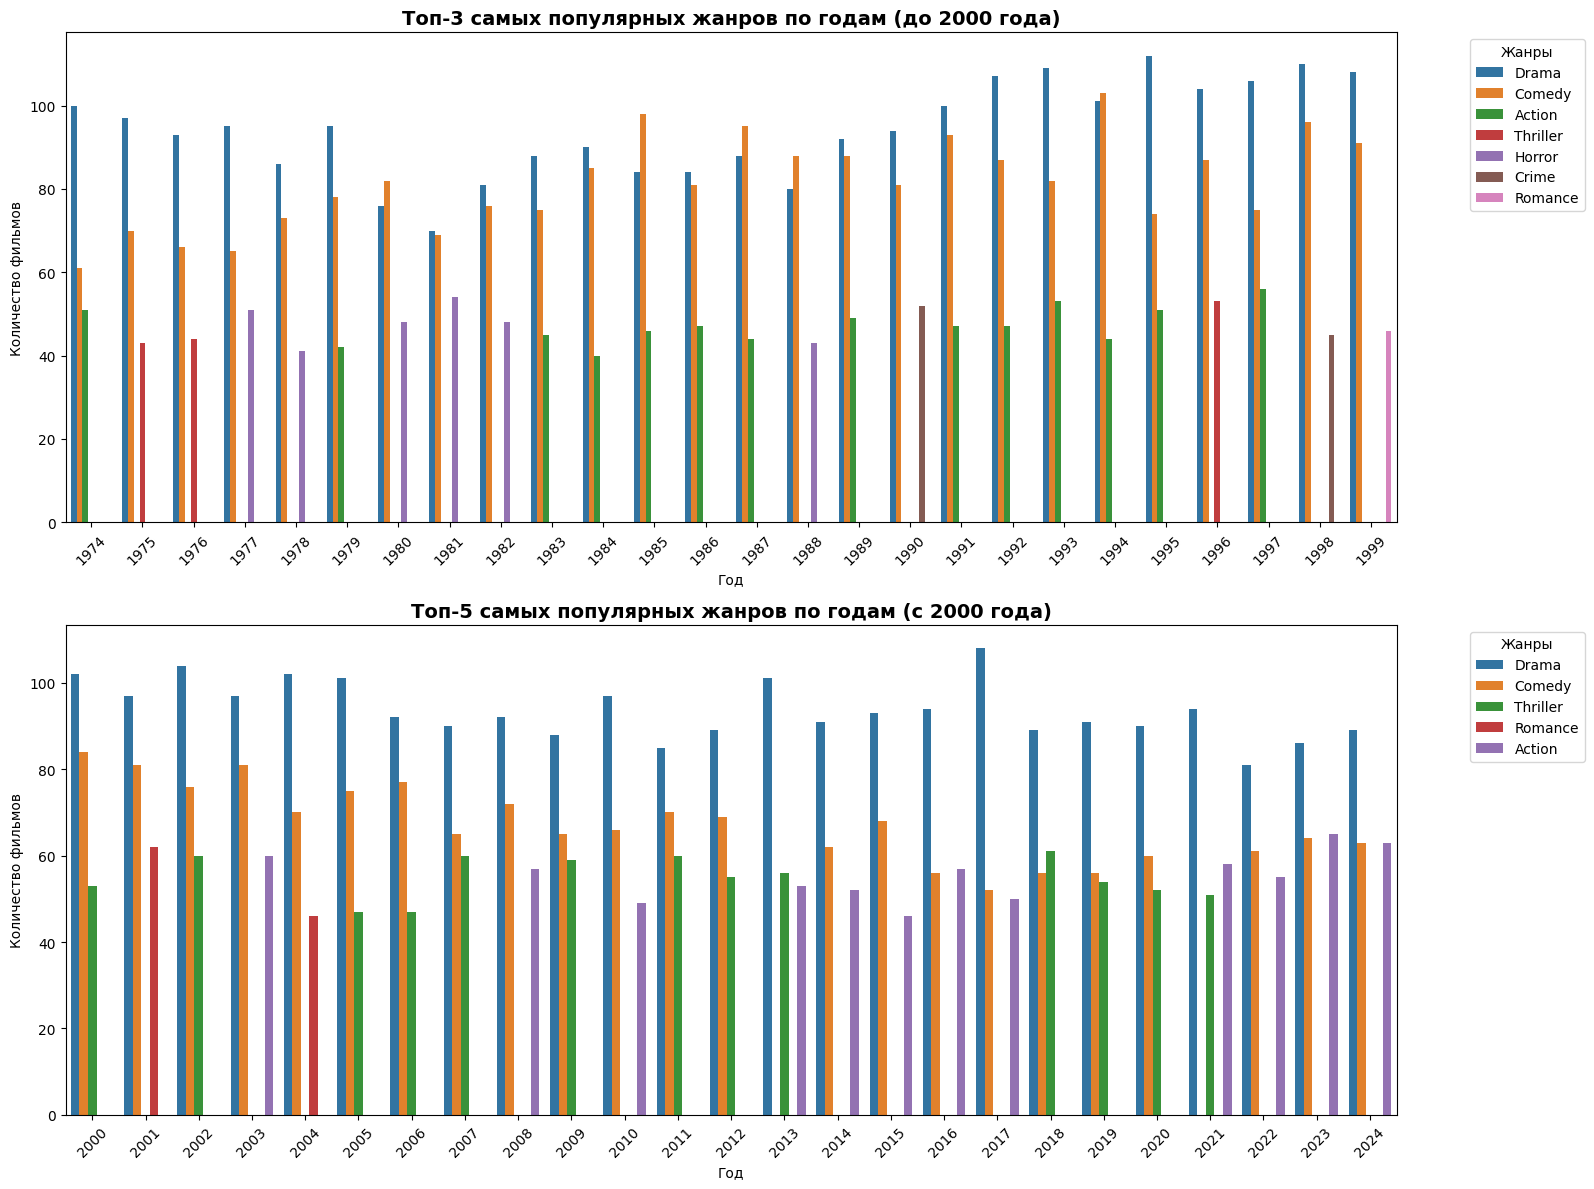

In [43]:
unique_genres = data.assign(genres=data['genres'].str.split(', ')).explode('genres')
genre_by_year = unique_genres.groupby(['year', 'genres']).size().reset_index(name='count')

top3_genre_by_year = genre_by_year.groupby('year').apply(
    lambda x: x.nlargest(3, 'count')
).reset_index(drop=True)

data_before_2000 = top3_genre_by_year[top3_genre_by_year['year'] < 2000]
data_after_2000 = top3_genre_by_year[top3_genre_by_year['year'] >= 2000]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

sns.barplot(data=data_before_2000, x='year', y='count', hue='genres', dodge=True, ax=ax1)
ax1.set_title('Топ-3 самых популярных жанров по годам (до 2000 года)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Год')
ax1.set_ylabel('Количество фильмов')
ax1.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=data_after_2000, x='year', y='count', hue='genres', dodge=True, ax=ax2)
ax2.set_title('Топ-5 самых популярных жанров по годам (с 2000 года)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Год')
ax2.set_ylabel('Количество фильмов')
ax2.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

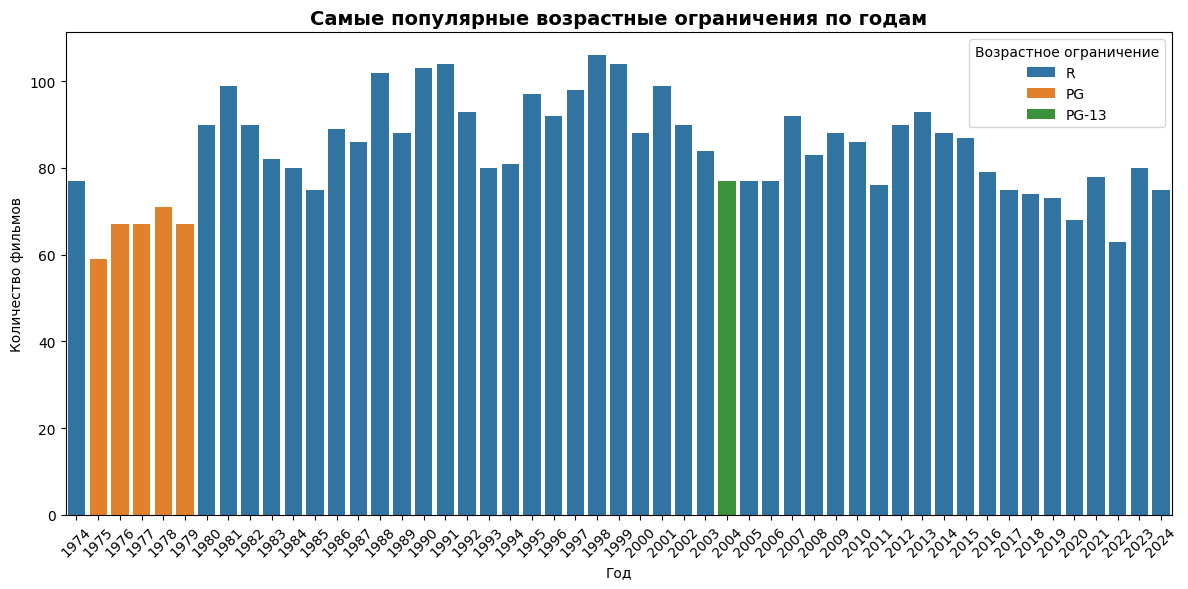

In [44]:
age_by_year = data.groupby(['year', 'age_limit']).size().reset_index(name='count')
top_age_by_year = age_by_year.loc[age_by_year.groupby('year')['count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_age_by_year, x='year', y='count', hue='age_limit', dodge=False)
plt.title('Самые популярные возрастные ограничения по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend(title='Возрастное ограничение')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Продолжительность*

In [45]:
duration_by_age = data.groupby('age_limit').agg(
    mean_duration=('duration', 'mean'),
    movie_count=('duration', 'count')
)

fig = px.bar(
    duration_by_age,
    x=duration_by_age.index,
    y='mean_duration',
    color='movie_count',
    title='Средняя продолжительность по возрастным ограничениям',
    labels={'mean_duration': 'Средняя продолжительность', 'index': 'Возрастное ограничение', 'movie_count': 'Количество фильмов'}
)

fig.show()


In [46]:
genres_duration_df = exploded_genres.to_frame(name='genre')
genres_duration_df['duration'] = data['duration']
duration_by_genre = genres_duration_df.groupby('genre').agg(
    mean_duration=('duration', 'mean'),
    movie_count=('duration', 'count')
).sort_values('mean_duration', ascending=False)

fig = px.bar(
    duration_by_genre,
    x=duration_by_genre.index,
    y='mean_duration',
    color='movie_count',
    title='Средняя продолжительность фильмов по жанрам',
    labels={'mean_duration': 'Средняя продолжительность', 'index': 'Жанр', 'movie_count': 'Количество фильмов'}
)

fig.show()

In [47]:
duration_by_year = data.groupby('year')['duration'].mean()

fig = px.line(
    duration_by_year,
    x=duration_by_year.index,
    y='duration',
    title='Средняя продолжительность фильмов по годам',
    labels={'duration': 'Средняя продолжительность', 'index': 'Год'}
)

fig.show()

*Страны*

*Жанры*

In [48]:
unique_genres = data['genres'].str.split(', ').explode().unique()
print("Количество уникальных жанров:", end=' ')
print(len(unique_genres))

Количество уникальных жанров: 24


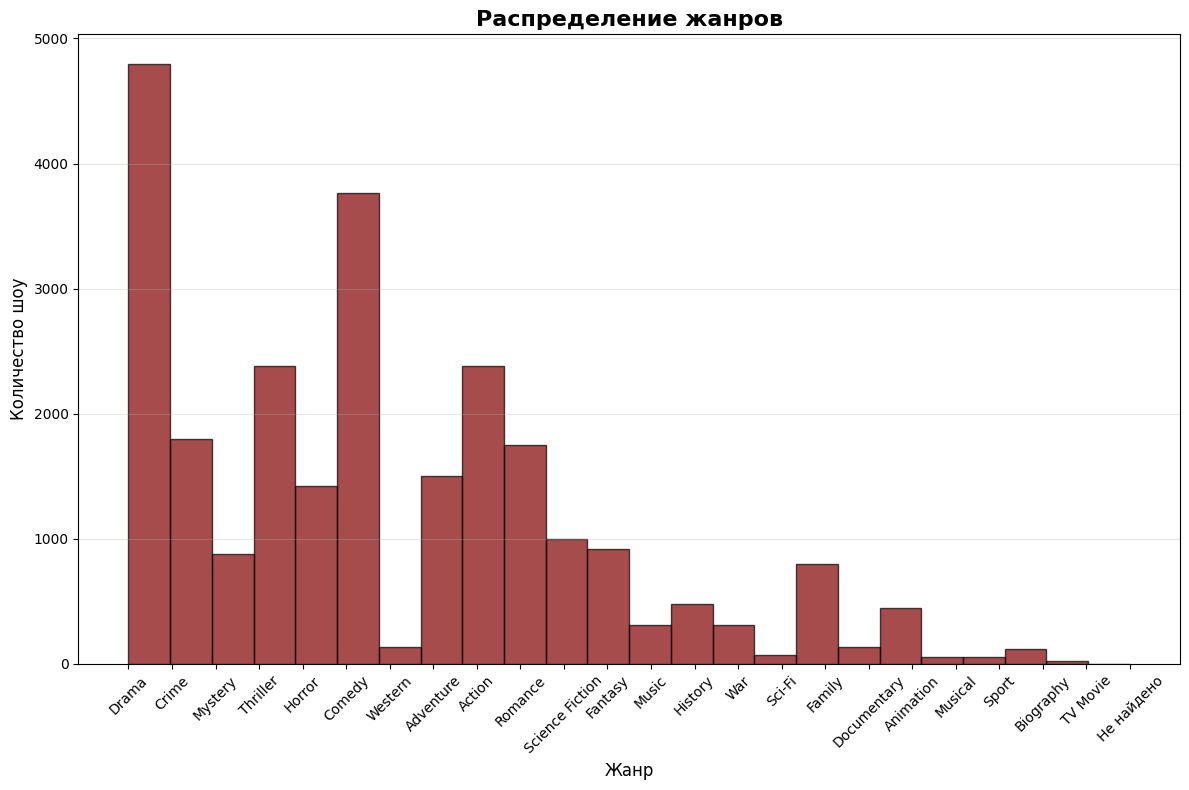

In [49]:
split_genres = data['genres'].str.split(', ')
exploded_genres = split_genres.explode()

plt.figure(figsize=(12, 8))
plt.hist(exploded_genres, bins=len(exploded_genres.unique()), edgecolor='black', alpha=0.7, color='maroon')
plt.title('Распределение жанров', fontsize=16, fontweight='bold')
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
split_genres = data['genres'].str.split(', ')
exploded_genres = split_genres.explode()
genres_df = exploded_genres.to_frame(name='genre')
genres_df['budget'] = data['budget']
genre_stats = genres_df.groupby('genre').agg(
    mean_budget=('budget', 'mean'),
    movie_count=('budget', 'count')
)
genre_stats = genre_stats.sort_values('mean_budget', ascending=False)

fig = px.bar(
    genre_stats,
    x=genre_stats.index,
    y='mean_budget',
    color='movie_count',
    title='Жанры по бюджету',
    labels={'mean_budget': 'cредний бюджет', 'index': 'Жанр', 'movie_count': 'Количество фильмов'}
)

fig.show()

In [51]:
genre_pairs = []
for genres in data['genres'].dropna():
    genre_list = genres.split(', ')
    filtered_genres = [genre for genre in genre_list if genre != 'TV Movie']
    if len(filtered_genres) >= 2:
      pairs = [tuple(sorted([filtered_genres[i], filtered_genres[j]]))
      for i in range(len(filtered_genres))
                for j in range(i+1, len(filtered_genres))]
      genre_pairs.extend(pairs)

pair_counts = pd.Series(genre_pairs).value_counts()

pair_df = pd.DataFrame({
    'pair': [' + '.join(pair) for pair in pair_counts.index],
    'count': pair_counts.values
})

fig = px.bar(pair_df,
             x='count',
             y='pair',
             orientation='h',
             title='Топ самых популярных пар жанров',
             labels={'count': 'Количество фильмов', 'pair': 'Пара жанров'})

fig.show()

In [52]:
genre_pair_ratings = []
for idx, row in data.dropna(subset=['genres']).iterrows():
    genre_list = row['genres'].split(', ')
    if len(genre_list) >= 2:

        pairs = [tuple(sorted([genre_list[i], genre_list[j]]))
                for i in range(len(genre_list))
                for j in range(i+1, len(genre_list))]
        for pair in pairs:
            genre_pair_ratings.append({
                'pair': pair,
                'rating': row['rating']
            })

pair_ratings_df = pd.DataFrame(genre_pair_ratings)
pair_stats = pair_ratings_df.groupby('pair').agg(
    mean_rating=('rating', 'mean'),
    count=('rating', 'count')
).sort_values('mean_rating', ascending=False).head(20)

top_pairs_df = pd.DataFrame({
    'pair': [' + '.join(pair) for pair in pair_stats.index],
    'mean_rating': pair_stats['mean_rating'].values,
    'count': pair_stats['count'].values
})

fig = px.bar(top_pairs_df,
             x='mean_rating',
             y='pair',
             orientation='h',
             color='count',
             title='Топ-20 самых высокорейтинговых пар жанров',
             labels={'mean_rating': 'Средний рейтинг', 'pair': 'Пара жанров', 'count': 'Количество фильмов'})

fig.show()

**Feature Engineering**

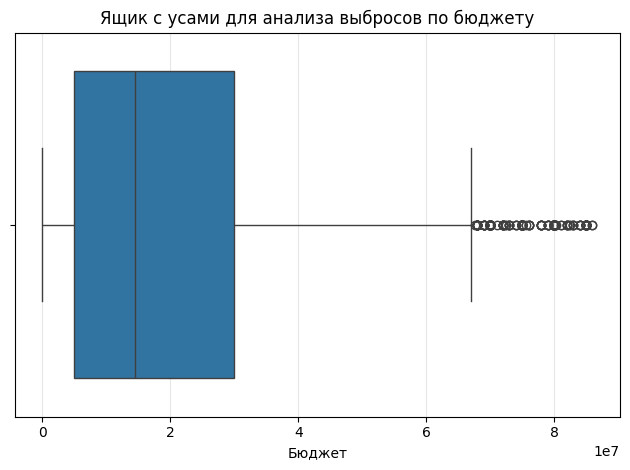

In [53]:
clean_budget = data['budget'].dropna()
Q1 = clean_budget.quantile(0.25)
Q3 = clean_budget.quantile(0.75)
IQR = Q3 - Q1
filtered_budget = clean_budget[(clean_budget >= Q1 - 1.5 * IQR) & (clean_budget <= Q3 + 1.5 * IQR)]
sns.boxplot(x=filtered_budget)
plt.xlabel('Бюджет')
plt.title('Ящик с усами для анализа выбросов по бюджету')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
Q1 = data_filtered['budget'].quantile(0.25)
Q3 = data_filtered['budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR
outliers = data_filtered[(data_filtered['budget'] < lower_bound) | (data_filtered['budget'] > upper_bound)]
data_filtered = data_filtered[
    (data_filtered['budget'] >= lower_bound) &
    (data_filtered['budget'] <= upper_bound) &
    (data_filtered['budget'] >= 10000)]
data_filtered

,title,year,duration,age_limit,movie_id,country,genres,revenue,budget,rating,age_rating
0,The Godfather Part II,1974,202,R,tt0071562,United States of America,"Drama, Crime",102600000.0,13000000.0,8.7855,17.0
1,Chinatown,1974,130,R,tt0071315,United States of America,"Crime, Drama, Mystery, Thriller",30000000.0,6000000.0,8.0085,17.0
2,The Texas Chain Saw Massacre,1974,83,R,tt0072271,United States of America,Horror,30922680.0,140000.0,7.3415,17.0
3,Young Frankenstein,1974,106,PG,tt0072431,United States of America,Comedy,86273333.0,2800000.0,7.9310,7.0
4,Blazing Saddles,1974,93,R,tt0071230,United States of America,"Western, Comedy",119500000.0,2600000.0,7.4720,17.0
...,...,...,...,...,...,...,...,...,...,...,...
9891,Memoir of a Snail,2024,95,R,tt23770030,Australia,"Animation, Drama, Comedy",7.0,4350000.0,7.9305,17.0
9893,Nickel Boys,2024,140,PG-13,tt23055660,United States,Drama,3016380.0,20000000.0,6.9000,13.0
9895,Devara Part 1,2024,176,TV-MA,tt11821912,India,"Action, Adventure, Drama",7361414.0,36500000.0,6.0000,17.0
9907,The Killers Game,2024,104,R,tt0327785,"United States of America, United Kingdom, Spai...","Action, Comedy, Thriller",5928351.0,30000000.0,6.0875,17.0


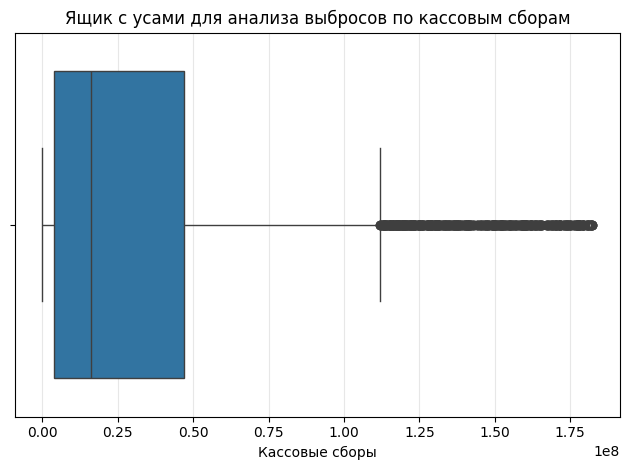

In [55]:
clean_revenue = data['revenue'].dropna()
Q1 = clean_revenue.quantile(0.25)
Q3 = clean_revenue.quantile(0.75)
IQR = Q3 - Q1
filtered_revenue = clean_revenue[(clean_revenue >= Q1 - 1.5 * IQR) & (clean_revenue <= Q3 + 1.5 * IQR)]
sns.boxplot(x=filtered_revenue)
plt.xlabel('Кассовые сборы')
plt.title('Ящик с усами для анализа выбросов по кассовым сборам')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
Q1 = data_filtered['revenue'].quantile(0.25)
Q3 = data_filtered['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR
outliers = data_filtered[(data_filtered['revenue'] < lower_bound) | (data_filtered['revenue'] > upper_bound)]
data_filtered = data_filtered[
    (data_filtered['revenue'] >= lower_bound) &
    (data_filtered['revenue'] <= upper_bound) &
    (data_filtered['revenue'] >= 10000)
]

У нас есть колонки, связанные с деньгами, сколько было затрачено на производство фильма и его кассовые сборы. При помощи Feature Engineering создадим новый признак, показывающий прибль с фильма (сборы - затраты) для использования его в дальнейшем анализе.

In [57]:
data_filtered['profit']=data_filtered['revenue']-data_filtered['budget']
data_filtered

/tmp/ipython-input-1552311711.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,year,duration,age_limit,movie_id,country,genres,revenue,budget,rating,age_rating,profit
0,The Godfather Part II,1974,202,R,tt0071562,United States of America,"Drama, Crime",102600000.0,1.300000e+07,8.7855,17.0,8.960000e+07
1,Chinatown,1974,130,R,tt0071315,United States of America,"Crime, Drama, Mystery, Thriller",30000000.0,6.000000e+06,8.0085,17.0,2.400000e+07
2,The Texas Chain Saw Massacre,1974,83,R,tt0072271,United States of America,Horror,30922680.0,1.400000e+05,7.3415,17.0,3.078268e+07
3,Young Frankenstein,1974,106,PG,tt0072431,United States of America,Comedy,86273333.0,2.800000e+06,7.9310,7.0,8.347333e+07
4,Blazing Saddles,1974,93,R,tt0071230,United States of America,"Western, Comedy",119500000.0,2.600000e+06,7.4720,17.0,1.169000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
9883,Marco,2024,145,Not Rated,tt29383379,India,"Action, Crime, Drama",1983898.0,4.324324e+06,6.7000,NaN,-2.340426e+06
9893,Nickel Boys,2024,140,PG-13,tt23055660,United States,Drama,3016380.0,2.000000e+07,6.9000,13.0,-1.698362e+07
9895,Devara Part 1,2024,176,TV-MA,tt11821912,India,"Action, Adventure, Drama",7361414.0,3.650000e+07,6.0000,17.0,-2.913859e+07
9907,The Killers Game,2024,104,R,tt0327785,"United States of America, United Kingdom, Spai...","Action, Comedy, Thriller",5928351.0,3.000000e+07,6.0875,17.0,-2.407165e+07


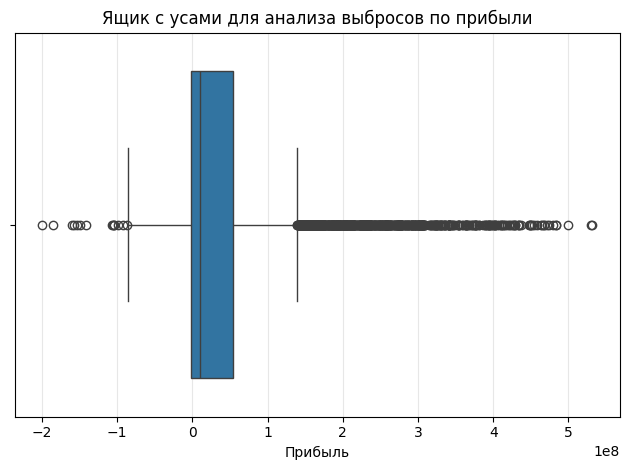

In [58]:
sns.boxplot(data_filtered, x='profit')
plt.xlabel('Прибыль')
plt.title('Ящик с усами для анализа выбросов по прибыли')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
Q1 = data_filtered['profit'].quantile(0.25)
Q3 = data_filtered['profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR
outliers = data_filtered[(data_filtered['profit'] < lower_bound) | (data_filtered['profit'] > upper_bound)]
data_filtered = data_filtered[(data_filtered['profit'] >= lower_bound) & (data_filtered['profit'] <= upper_bound)]
print(data_filtered)

                             title  year  duration  age_limit    movie_id  \
0            The Godfather Part II  1974       202          R   tt0071562   
1                        Chinatown  1974       130          R   tt0071315   
2     The Texas Chain Saw Massacre  1974        83          R   tt0072271   
3               Young Frankenstein  1974       106         PG   tt0072431   
4                  Blazing Saddles  1974        93          R   tt0071230   
...                            ...   ...       ...        ...         ...   
9883                         Marco  2024       145  Not Rated  tt29383379   
9893                   Nickel Boys  2024       140      PG-13  tt23055660   
9895                 Devara Part 1  2024       176      TV-MA  tt11821912   
9907              The Killers Game  2024       104          R   tt0327785   
9908                The Assessment  2024       114          R  tt32768323   

                                                country  \
0               

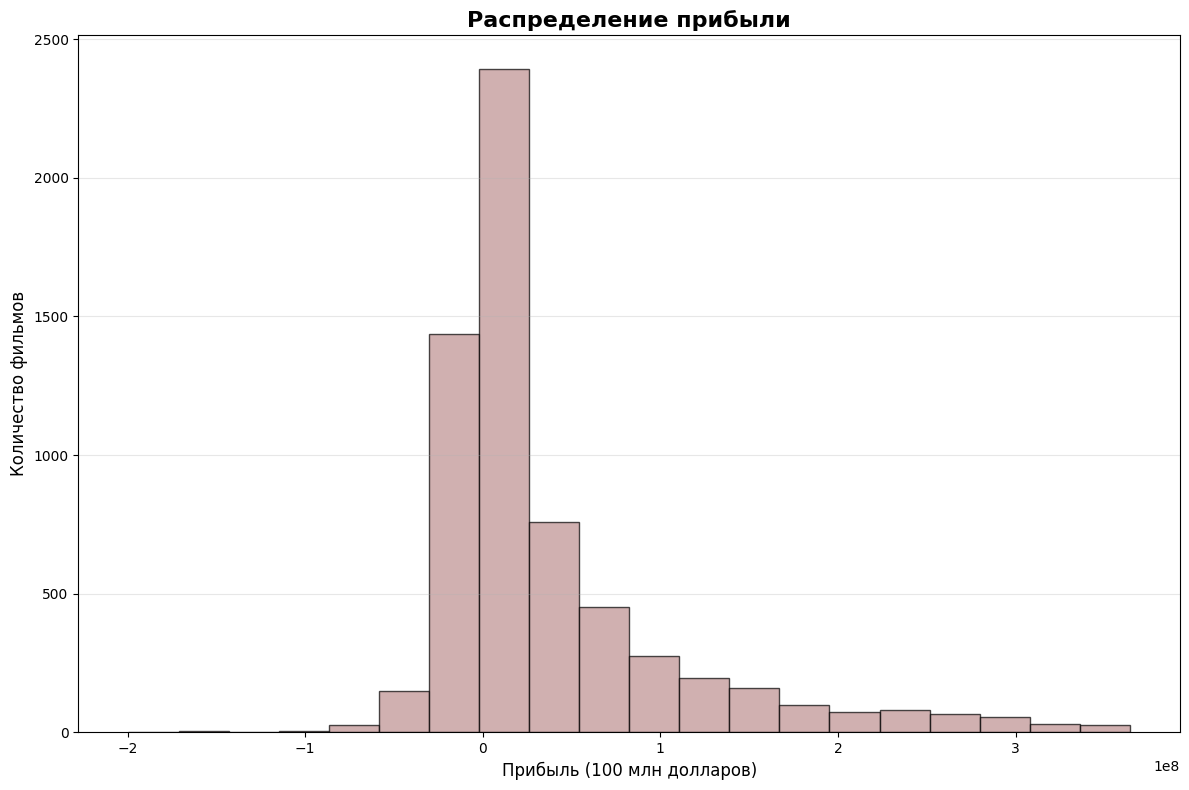

In [60]:
plt.figure(figsize=(12, 8))
plt.hist(data_filtered['profit'], bins=20, edgecolor='black', alpha=0.7, color='#BC8F8F')
plt.title('Распределение прибыли', fontsize=16, fontweight='bold')
plt.xlabel('Прибыль (100 млн долларов)', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Большинство фильмов имеют положительную прибыль, но так же есть те, что ушли в минус. Правая ассиметрия, значит есть небольшое колличество очень прибыльнх проектов. Широкий диапазон значений свидетельствует о высокй рискованности данного типа бизнеса.

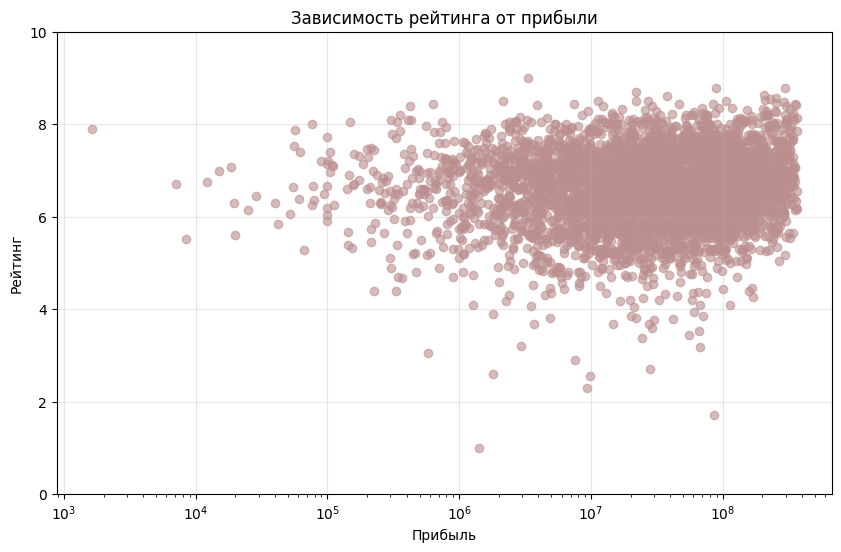

0.16840322148043674


In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['profit'], data_filtered['rating'], alpha=0.6, color='#BC8F8F')
plt.xlabel('Прибыль')
plt.ylabel('Рейтинг')
plt.title('Зависимость рейтинга от прибыли')
plt.grid(alpha=0.3)
plt.xscale('log')
plt.ylim(0, 10)
plt.show()
correlation = data_filtered['profit'].corr(data_filtered['rating'])
print(correlation)

Нет четкой зависимости от рейтинга и прибыли, у каждого рейтинга есть свой сектор прибыли. Не стоит использовать рейтинг как главную KPI прибыли и наоборот.

In [62]:
profit_by_year = data_filtered.groupby('year')['profit'].mean().reset_index()

fig = px.line(profit_by_year, x='year', y='profit', title='Средняя прибыль по годам выпуска', markers=True, color_discrete_sequence=['#BC8F8F'])

fig.update_layout(
    xaxis_title='Год выпуска',
    yaxis_title='Средняя прибыль',
    margin=dict(l=10, r=10, t=50, b=10),
    autosize=True,
)

fig.show()

По графику средняя сприбыль каждый год растет, не считая двух сильных падений. Первое, в 2015 скорее всего связано с популяризацией Netflix и других стриминговых платформ, но к 2016 году кинематограф адаптировался к конкурентной среде, а так же в 2016 вышли такие фильмы, как "Зоотопия", "Первый мститель: Противостояние" и др., которые вернули зрителей в кинотеатры. Самое большое падение в 2020 связано с коронавирусом, но о нем поговорим дальше.

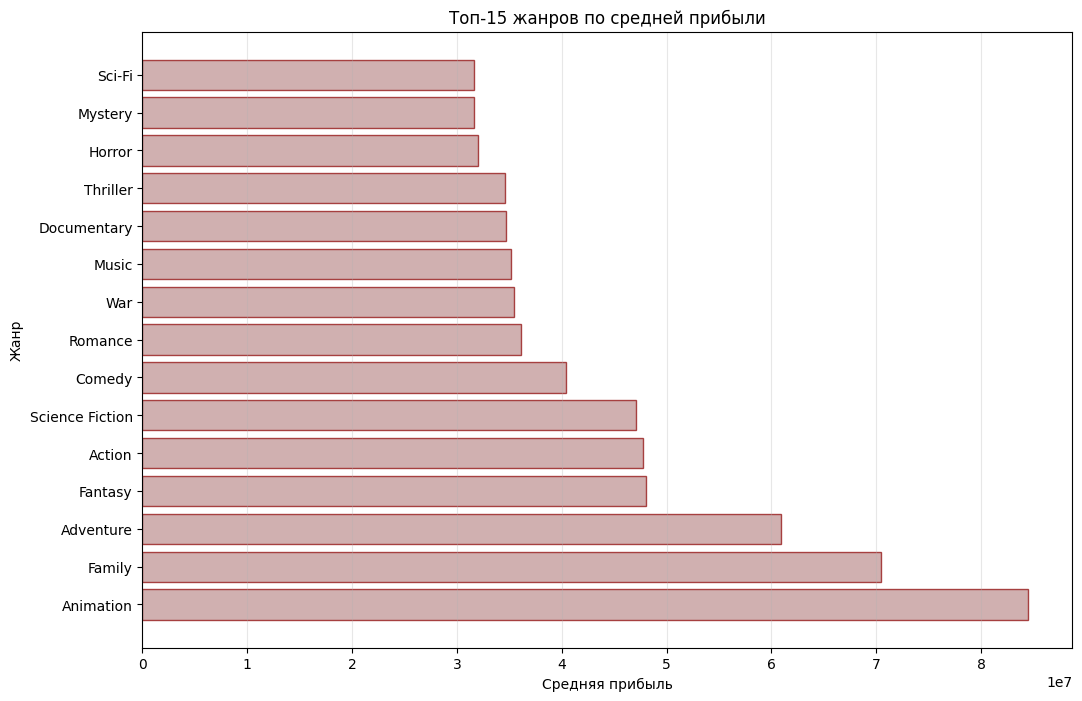

In [64]:
genres_expanded = data_filtered.assign(genre_split=data_filtered['genres'].str.split(', ')).explode('genre_split')

genres_profit_stats = genres_expanded.groupby('genre_split').agg(
    mean_profit=('profit', 'mean'),
    movie_count=('profit', 'count')
).reset_index()

genres_profit_stats.columns = ['genre', 'mean_profit', 'movie_count']

genres_profit_stats = genres_profit_stats[genres_profit_stats['genre'] != 'TV Movie']

genres_profit_stats = genres_profit_stats.sort_values('mean_profit', ascending=False)
top_15_genres = genres_profit_stats.head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_15_genres['genre'], top_15_genres['mean_profit'],
                color='#BC8F8F', edgecolor='darkred', alpha=0.7)
plt.xlabel('Средняя прибыль')
plt.ylabel('Жанр')
plt.title('Топ-15 жанров по средней прибыли')
plt.grid(axis='x', alpha=0.3)
plt.show()

Самыми прибыльными жанрами оказались анимационные, семейные и приключенческие, которые представляют детско-семейный контент, дальше идут более взрослые, такие как фантастика, научная фантастика и др. Это можно связать с тем, что на детские фильмы всегда берется больше одного билета(дети+родители), несколько супер успешных хитов от Disney или Pixar поднимают среднюю прибыль для всего жанра, когда у более взрослых хиты почти всегда разбросаны в разные, анимация требует меньшего бюджета, чем работа с реальными людьми, а также детский контент более универсален для разных стран

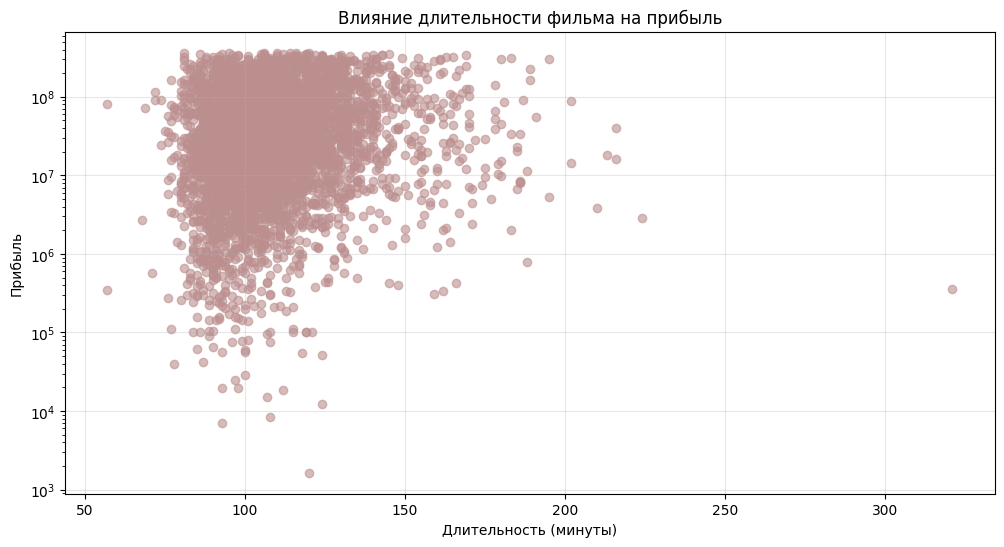

0.08646195906723665


In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(data_filtered['duration'], data_filtered['profit'], alpha=0.6, color='#BC8F8F')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Прибыль')
plt.title('Влияние длительности фильма на прибыль')
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show()
correlation = data_filtered['profit'].corr(data_filtered['duration'])
print(correlation)

Связь практически отсутсвует, нет оптимальной длительности, так как в каждой катеогрии большой разброс по прибыли. Так что длительность должна быть связано с необходимостью для истории, а не с учетом на прибыльность

**Анализ топ-100 фильмов по рейтингу**

Так как мы рассмотрели большое множество фильмов с самыми разными рейтингами, то можно уменьшить выборку и сконцентрироваться только на 100 самых успешных, посмотреть их данные и попробовать выявить причины успеха. Будем использовать некоторые анализы, какие были и для общей выборки, а потом проверим наличие изменений

In [66]:
top_100_by_rating = data.dropna(subset=['revenue', 'budget']).nlargest(100, 'rating').reset_index(drop=True)
print("Топ-10 фильмов по рейтингу и их жанры:")
display(top_100_by_rating)
top_100_rating = data.nlargest(100, 'rating').copy()


Топ-10 фильмов по рейтингу и их жанры:


,title,year,duration,age_limit,movie_id,country,genres,revenue,budget,rating,age_rating,duration_bins
0,The Shawshank Redemption,1994,142,R,tt0111161,United States of America,"Drama, Crime",2.834147e+07,25000000.0,9.0055,17.0,"(108.375, 173.75]"
1,The Dark Knight,2008,152,PG-13,tt0468569,"United Kingdom, United States of America","Drama, Action, Crime, Thriller",1.004558e+09,185000000.0,8.8000,13.0,"(108.375, 173.75]"
2,The Godfather Part II,1974,202,R,tt0071562,United States of America,"Drama, Crime",1.026000e+08,13000000.0,8.7855,17.0,"(173.75, 239.125]"
3,Schindlers List,1993,195,R,tt0108052,United States of America,"Drama, History, War",3.213656e+08,22000000.0,8.7830,17.0,"(173.75, 239.125]"
4,The Lord of the Rings The Return of the King,2003,201,PG-13,tt0167260,"New Zealand, United States of America","Adventure, Fantasy, Action",1.118889e+09,94000000.0,8.7450,13.0,"(173.75, 239.125]"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3 Idiots,2009,170,PG-13,tt1187043,India,"Drama, Comedy",7.000000e+07,9000000.0,8.1985,13.0,"(108.375, 173.75]"
96,The Hunt,2012,115,R,tt2106476,"Denmark, Sweden",Drama,1.830000e+07,3800000.0,8.1975,17.0,"(108.375, 173.75]"
97,Eternal Sunshine of the Spotless Mind,2004,108,R,tt0338013,United States of America,"Science Fiction, Drama, Romance",7.225813e+07,20000000.0,8.1960,17.0,"(42.477, 108.375]"
98,Top Gun Maverick,2022,130,PG-13,tt1745960,United States of America,"Action, Drama",1.488733e+09,170000000.0,8.1830,13.0,"(108.375, 173.75]"


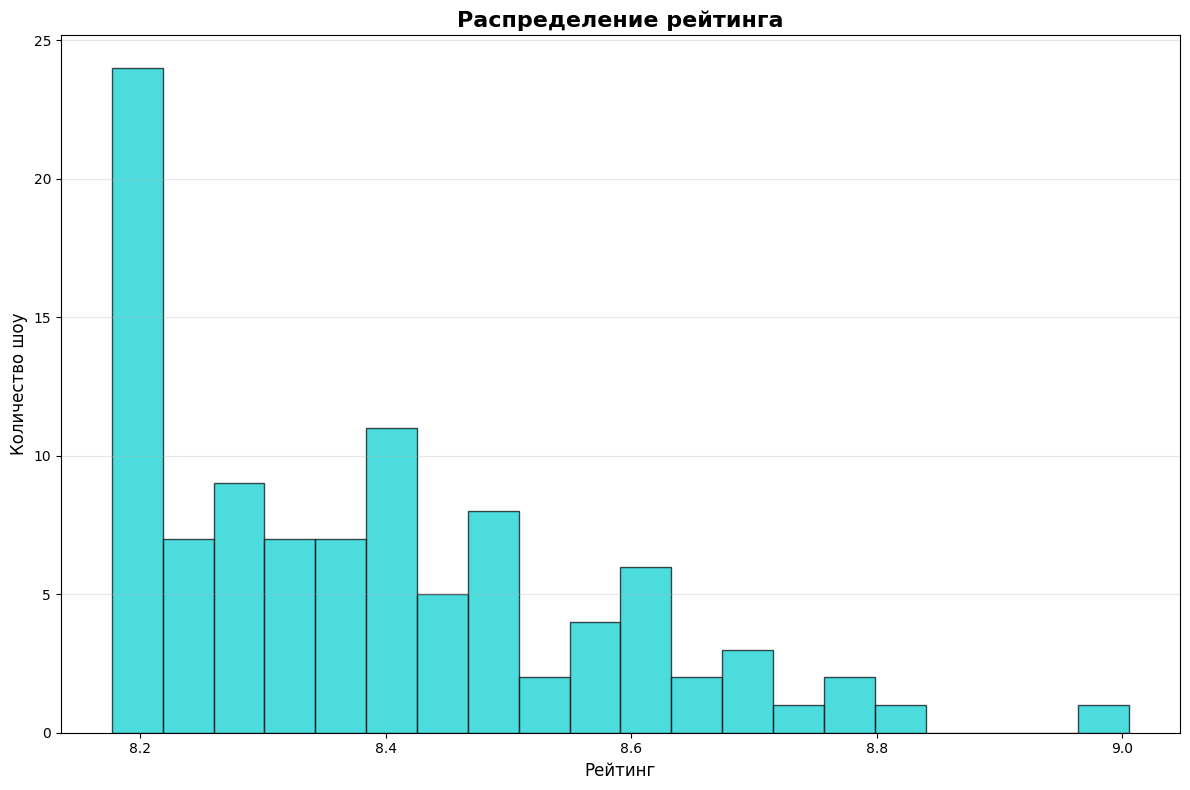

In [67]:
plt.figure(figsize=(12, 8))
plt.hist(top_100_by_rating['rating'], bins=20, edgecolor='black', alpha=0.7, color='darkturquoise')
plt.title('Распределение рейтинга', fontsize=16, fontweight='bold')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

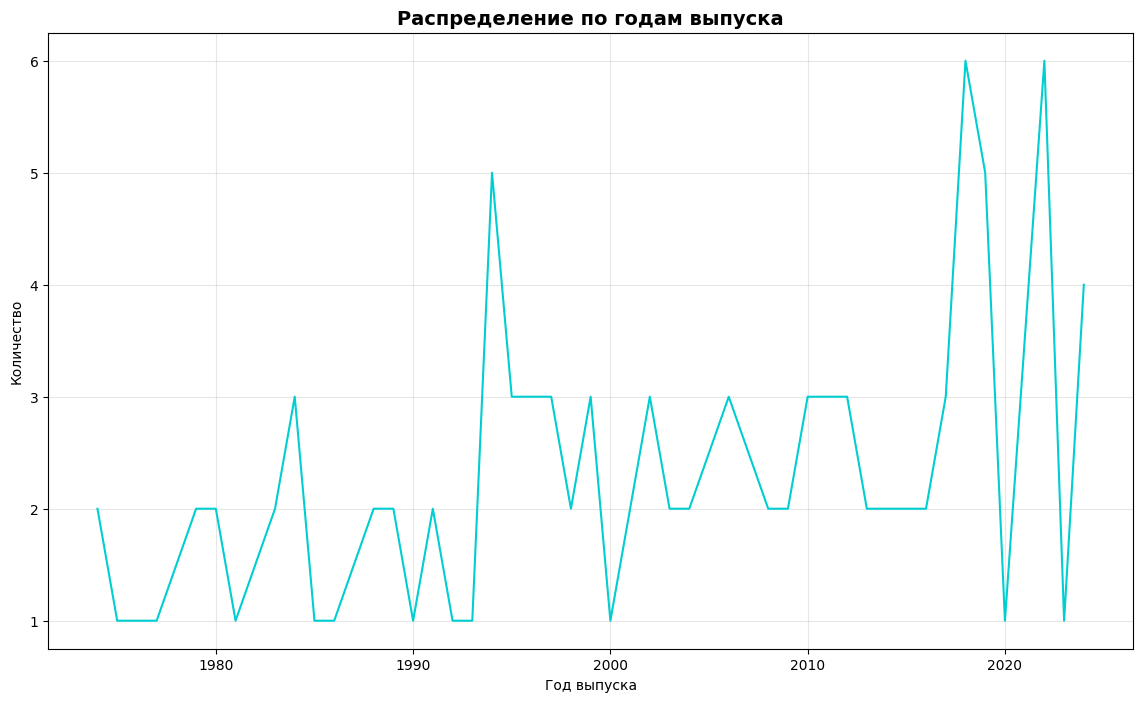

In [68]:
year_counts = top_100_by_rating['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']
plt.figure(figsize=(14,8))
sns.lineplot(data=year_counts, x='year', y='count', color='darkturquoise')
plt.title('Распределение по годам выпуска', fontsize=14, fontweight='bold')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

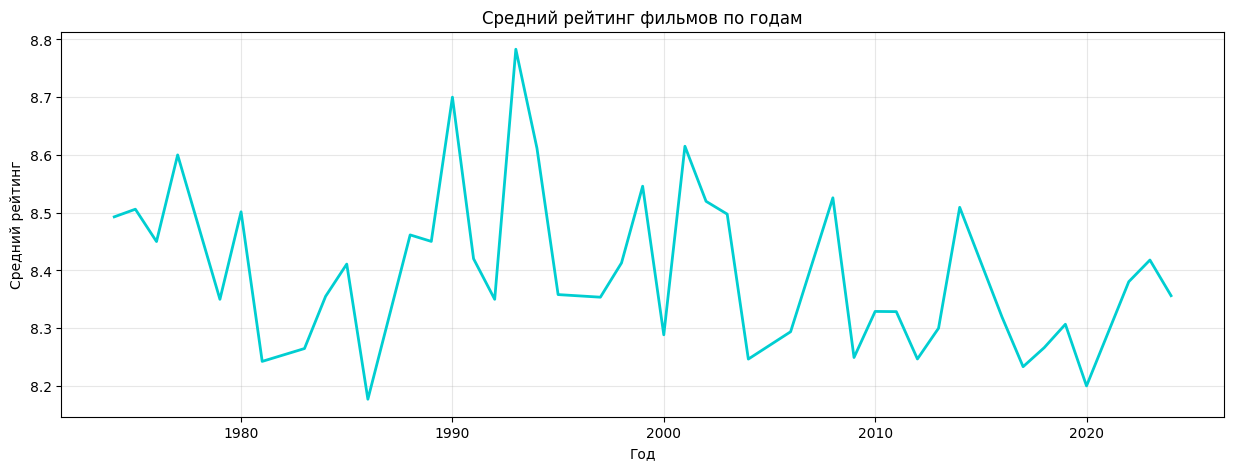

In [69]:
plt.figure(figsize=(15, 5))
yearly_rating = top_100_by_rating.groupby('year')['rating'].mean()
plt.plot(yearly_rating.index, yearly_rating.values, linewidth=2, color='darkturquoise')
plt.title('Средний рейтинг фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')
plt.grid(True, alpha=0.3)

In [70]:
countries_genres_expanded =  top_100_by_rating.assign(
    country_split=data['country'].str.split(', '),
    genres_split=data['genres'].str.split(', ')
).explode('country_split').explode('genres_split')


country_genre_stats = countries_genres_expanded.groupby(['country_split', 'genres_split']).size().reset_index(name='count')


top_genre_by_country = country_genre_stats.loc[country_genre_stats.groupby('country_split')['count'].idxmax()]

fig = px.bar(top_genre_by_country,
             x='country_split',
             y='count',
             color='genres_split',
             title='Самые популярные жанры по странам',
             labels={'country_split': 'Страна', 'count': 'Количество фильмов', 'genres_split': 'Жанр'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [71]:
countries_expanded = top_100_by_rating.assign(country_split=top_100_by_rating['country'].str.split(', ')).explode('country_split')

countries_stats = countries_expanded.groupby('country_split').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
).reset_index()

countries_stats.columns = ['country', 'rating', 'movie_count']

fig = px.bar(countries_stats, x='country', y='rating', color='movie_count',
             title='Средний рейтинг фильмов по странам')

fig.update_layout(
    xaxis_title='Страна',
    yaxis_title='Средний рейтинг',
    margin=dict(l=10, r=10, t=50, b=10),
    yaxis_range=[0, 10]
)

fig.show()

In [72]:
top_100_by_rating['duration_bins'] = pd.cut(top_100_by_rating['duration'], bins=8)

duration_stats = top_100_by_rating.groupby('duration_bins').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
)

fig = px.bar(
    duration_stats,
    x=duration_stats.index.astype(str),
    y='mean_rating',
    color='movie_count',
    title='Рейтинг по продолжительности',
    labels={'mean_rating': 'Средний рейтинг', 'x': 'Интервалы продолжительности', 'movie_count': 'Количество фильмов'}
)

fig.show()

/tmp/ipython-input-1803568112.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [73]:
split_genres = top_100_by_rating['genres'].str.split(', ')
exploded_genres = split_genres.explode()
genres_df = exploded_genres.to_frame(name='genre')
genres_df['rating'] = data['rating']
genre_stats = genres_df.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    movie_count=('rating', 'count')
)
genre_stats = genre_stats.sort_values('mean_rating', ascending=False)

fig = px.bar(
    genre_stats,
    x=genre_stats.index,
    y='mean_rating',
    color='movie_count',
    title='жанры по рейтингу',
    labels={'mean_rating': 'cредний рейтинг', 'index': 'Жанр', 'movie_count': 'Количество фильмов'}
)
fig.update_layout(
    yaxis_range=[0, 10]
)

fig.show()

In [74]:
rating_counts = top_100_rating['rating'].value_counts()
fig = px.pie(names=rating_counts.index, values=rating_counts.values)

fig.update_layout(
    title="Распределение шоу по рейтингам",
    title_x=0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    width=800,
    height=600
)

fig.update_traces(
    hovertemplate='<b>rating:</b> %{label}<br><b>Количество:</b> %{value}<br>'
)

fig.show()

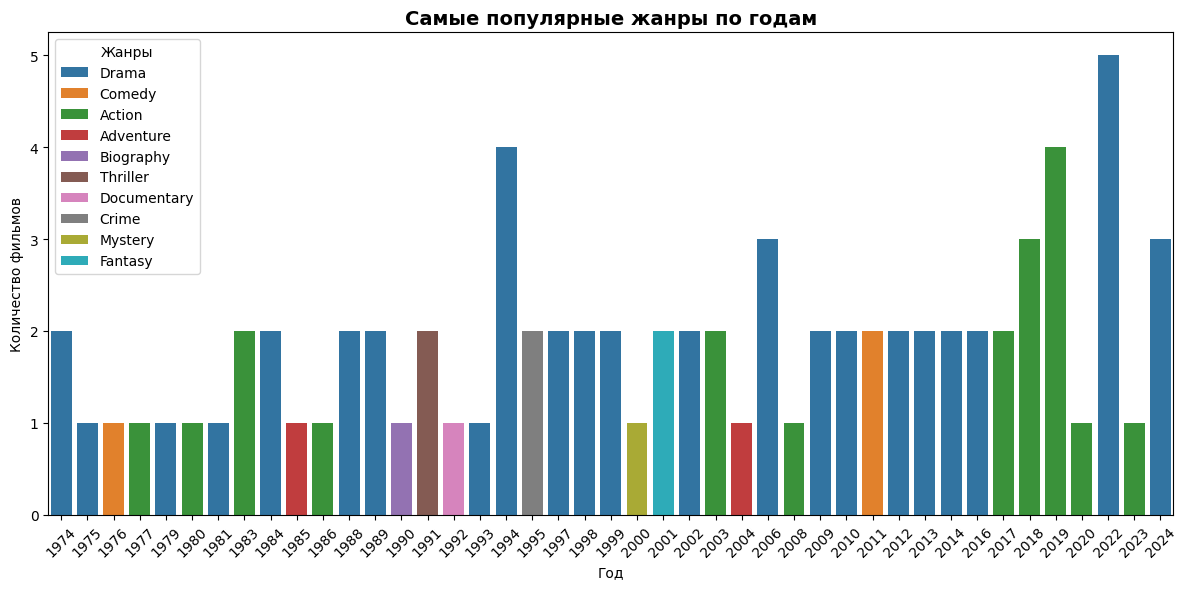

In [75]:
unique_genres =  top_100_by_rating.assign(genres=top_100_by_rating['genres'].str.split(', ')).explode('genres')
genre_by_year = unique_genres.groupby(['year', 'genres']).size().reset_index(name='count')
top_genre_by_year = genre_by_year.loc[genre_by_year.groupby('year')['count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_by_year, x='year', y='count', hue='genres', dodge=False)
plt.title('Самые популярные жанры по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend(title='Жанры')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
data_exploded = top_100_by_rating.assign(genres=data['genres'].str.split(', ')).explode('genres')

genre_rating_by_year = data_exploded.groupby(['year', 'genres'])['rating'].mean().reset_index()

best_genre_by_year = genre_rating_by_year.loc[genre_rating_by_year.groupby('year')['rating'].idxmax()]

print("Жанр с лучшим рейтингом в каждом году:")
for i, row in best_genre_by_year.iterrows():
    print(f"{row['year']}: {row['genres']} - рейтинг {row['rating']:.2f}")

Жанр с лучшим рейтингом в каждом году:
1974: Horror - рейтинг 8.79
1975: Comedy - рейтинг 8.51
1976: Action - рейтинг 8.45
1977: Action - рейтинг 8.60
1979: Comedy - рейтинг 8.35
1980: Crime - рейтинг 8.70
1981: Action - рейтинг 8.24
1983: Action - рейтинг 8.30
1984: Crime - рейтинг 8.50
1985: Drama - рейтинг 8.41
1986: Action - рейтинг 8.18
1988: Comedy - рейтинг 8.47
1989: Action - рейтинг 8.70
1990: Drama - рейтинг 8.70
1991: Comedy - рейтинг 8.47
1992: Comedy - рейтинг 8.35
1993: Comedy - рейтинг 8.78
1994: Crime - рейтинг 8.68
1995: Drama - рейтинг 8.37
1997: Crime - рейтинг 8.37
1998: Comedy - рейтинг 8.41
1999: Action - рейтинг 8.62
2000: Horror - рейтинг 8.29
2001: Horror - рейтинг 8.66
2002: Romance - рейтинг 8.61
2003: Comedy - рейтинг 8.75
2004: Adventure - рейтинг 8.30
2006: Horror - рейтинг 8.35
2008: Crime - рейтинг 8.53
2009: Crime - рейтинг 8.30
2010: Romance - рейтинг 8.59
2011: Crime - рейтинг 8.40
2012: Comedy - рейтинг 8.25
2013: Action - рейтинг 8.40
2014: Action -

In [79]:
data_filtered['profit_percent'] = (data_filtered['revenue'] - data_filtered['budget']) / data_filtered['budget'] * 100

genres_profit_df = data_filtered['genres'].str.split(', ').explode().to_frame(name='genre')
genres_profit_df['profit_percent'] = data_filtered['profit_percent']

profit_by_genre = genres_profit_df.groupby('genre')['profit_percent'].mean().sort_values(ascending=False)

fig = px.bar(
    profit_by_genre,
    x=profit_by_genre.index,
    y='profit_percent',
    title='Средняя прибыль в процентах по жанрам',
    labels={'profit_percent': 'Прибыль (%)', 'index': 'Жанр'}
)

fig.show()

/tmp/ipython-input-2867794070.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Анализ влияния коронавируса на сферу кинофильмов**

Одним из самых значимых внешних факторов для сферы кино был период пандемии, так как люди без возможности выйти на улицу в качестве развлечения часто прибегали к просмотру различных фильмов. Проверим изменился ли спрос и предпочтения зрителей в данный период и после него. Рассмотрим три группы:
*   2014-2018, период "до". Будем рассматривать небольшой временной отрезок непосредственно перед карантном, так как больший разрыв во времени может дать не точные данные
*   2019-2021, период "во время". Непосредственно года, в которых действовал карантин
*   2022-2024, период "после". Нужен для того, чтобы посмотреть сохраниоись ли изменения уже после снятия карантина, вернулись к тому, что было до или изменились во что-то новое



In [80]:
data['period'] = np.select(
    [
        (data['year'] >= 2014) & (data['year'] <= 2018),
        (data['year'] >= 2019) & (data['year'] <= 2021),
        (data['year'] >= 2022) & (data['year'] <= 2024)
    ],
    ['2016-2019', '2020-2021', '2022-2024'],
    default='Другие годы'
)
print(data['period'].value_counts())


period
Другие годы    7841
2016-2019       943
2020-2021       565
2022-2024       561
Name: count, dtype: int64


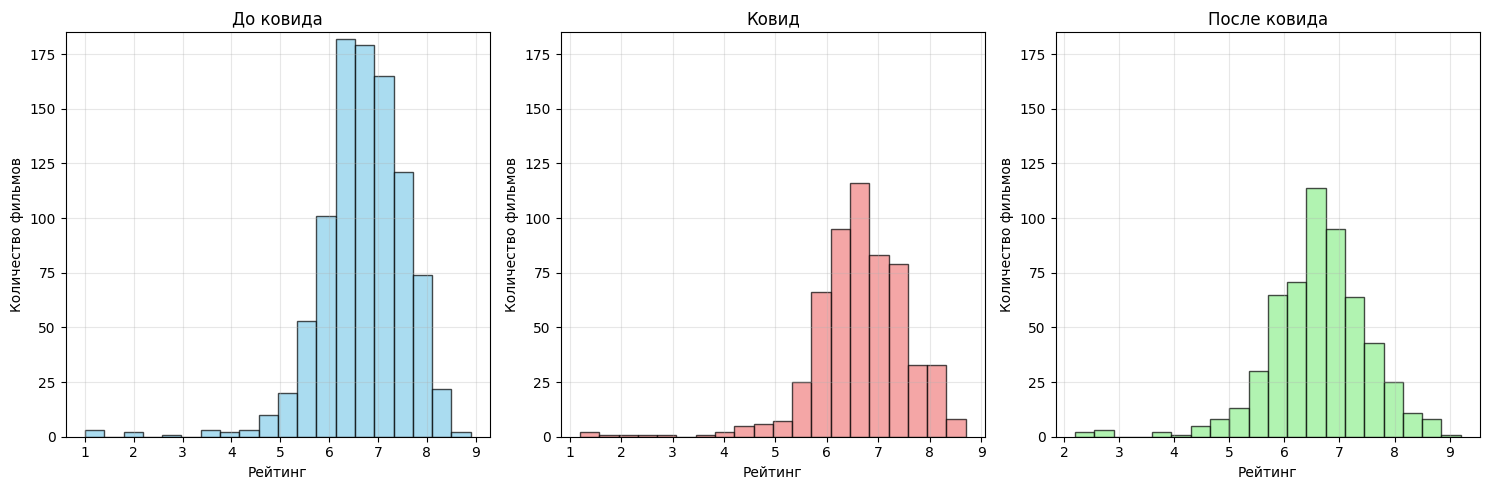

In [78]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
period_data = data[data['period'] == '2016-2019']['rating']
plt.hist(period_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('До ковида')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 185)

plt.subplot(1, 3, 2)
period_data = data[data['period'] == '2020-2021']['rating']
plt.hist(period_data, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Ковид')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 185)

plt.subplot(1, 3, 3)
period_data = data[data['period'] == '2022-2024']['rating']
plt.hist(period_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('После ковида')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 185)

plt.tight_layout()
plt.show()

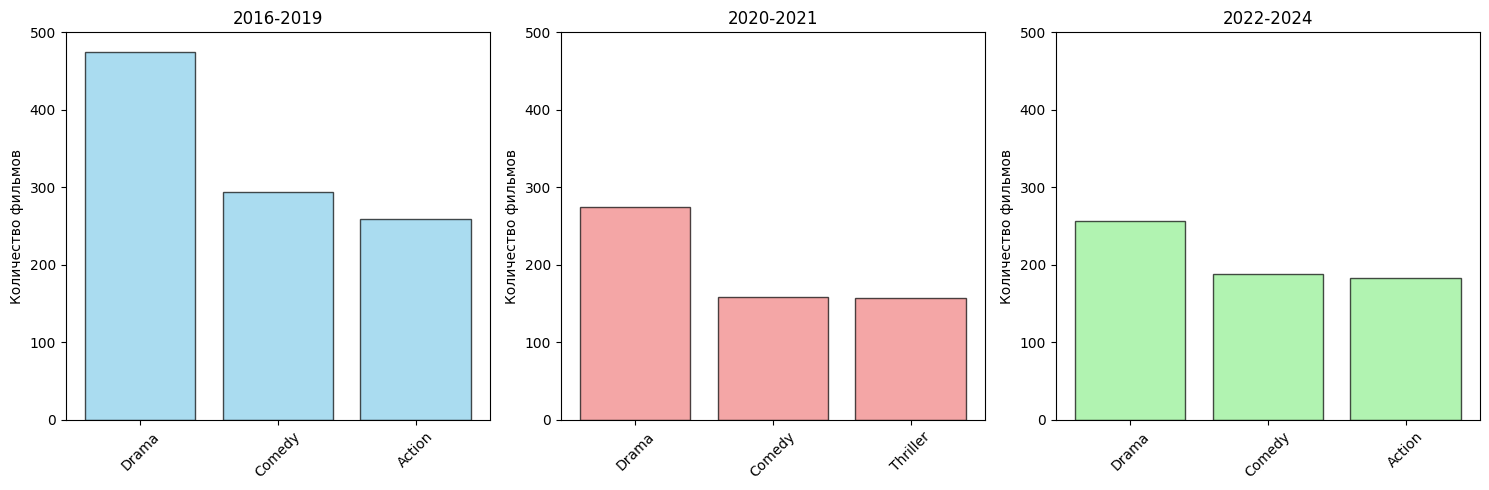

In [ ]:
plt.figure(figsize=(15, 5))

periods = ['2016-2019', '2020-2021', '2022-2024']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, period in enumerate(periods, 1):
    plt.subplot(1, 3, i)

    period_data = data[data['period'] == period]
    genres_expanded = period_data.assign(genre_split=period_data['genres'].str.split(', ')).explode('genre_split')
    top_genres = genres_expanded['genre_split'].value_counts().head(3)

    plt.bar(top_genres.index, top_genres.values, alpha=0.7, color=colors[i-1], edgecolor='black')
    plt.title(period)
    plt.xticks(rotation=45)
    plt.ylabel('Количество фильмов')
    plt.ylim(0, 500)

plt.tight_layout()
plt.show()

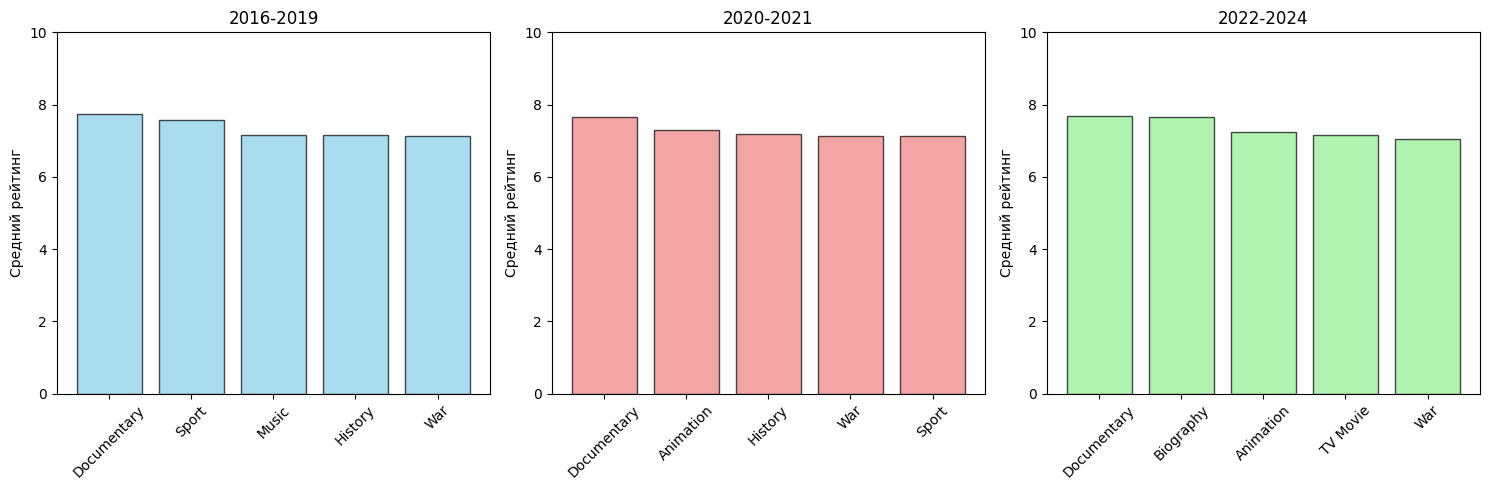

In [ ]:
plt.figure(figsize=(15, 5))

periods = ['2016-2019', '2020-2021', '2022-2024']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, period in enumerate(periods, 1):
    plt.subplot(1, 3, i)

    period_data = data[data['period'] == period]
    genres_expanded = period_data.assign(genre_split=period_data['genres'].str.split(', ')).explode('genre_split')

    top_genres_rating = genres_expanded.groupby('genre_split')['rating'].mean().nlargest(5)

    plt.bar(top_genres_rating.index, top_genres_rating.values, alpha=0.7, color=colors[i-1], edgecolor='black')
    plt.title(period)
    plt.xticks(rotation=45)
    plt.ylabel('Средний рейтинг')
    plt.ylim(0, 10)

plt.tight_layout()
plt.show()

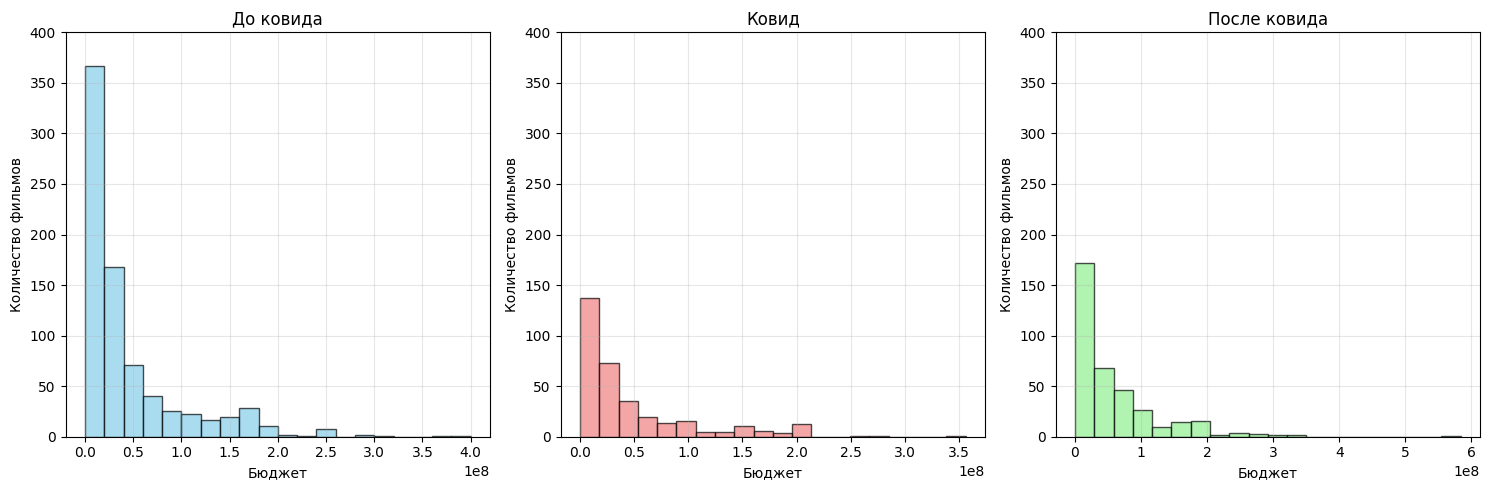

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
period_data = data[data['period'] == '2016-2019']['budget']
plt.hist(period_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('До ковида')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 400)

plt.subplot(1, 3, 2)
period_data = data[data['period'] == '2020-2021']['budget']
plt.hist(period_data, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Ковид')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 400)

plt.subplot(1, 3, 3)
period_data = data[data['period'] == '2022-2024']['budget']
plt.hist(period_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('После ковида')
plt.xlabel('Бюджет')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 400)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1877957717.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-1877957717.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-1877957717.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



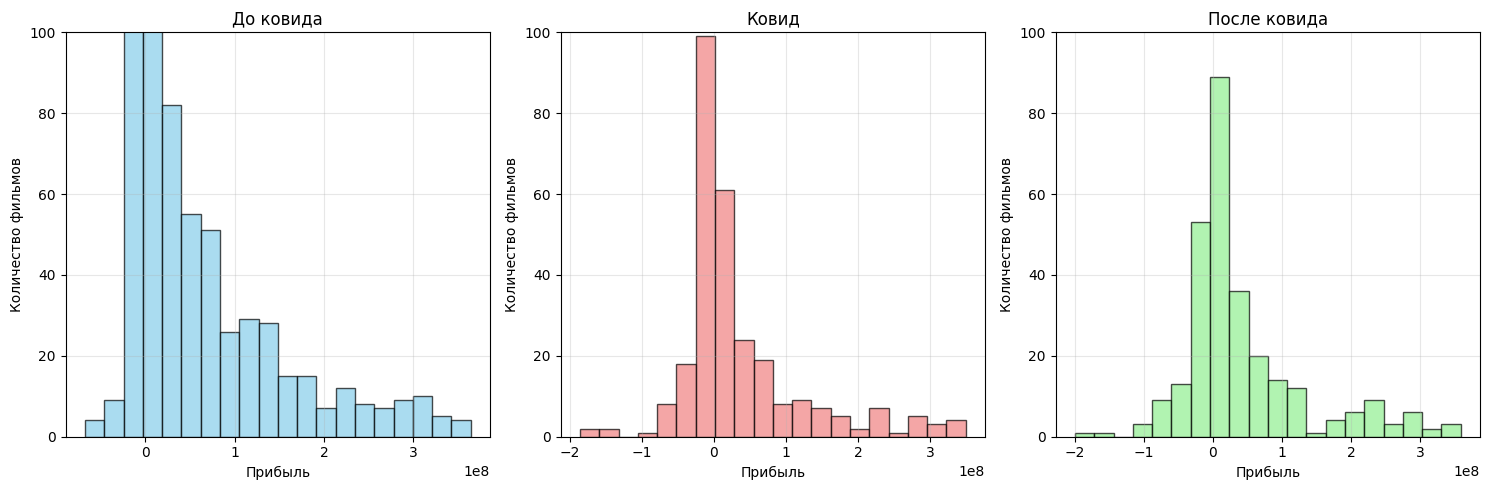

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
period_data = data_filtered[data['period'] == '2016-2019']['profit']
plt.hist(period_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('До ковида')
plt.xlabel('Прибыль')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
period_data = data_filtered[data['period'] == '2020-2021']['profit']
plt.hist(period_data, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Ковид')
plt.xlabel('Прибыль')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 100)

plt.subplot(1, 3, 3)
period_data = data_filtered[data['period'] == '2022-2024']['profit']
plt.hist(period_data, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('После ковида')
plt.xlabel('Прибыль')
plt.ylabel('Количество фильмов')
plt.grid(alpha=0.3)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

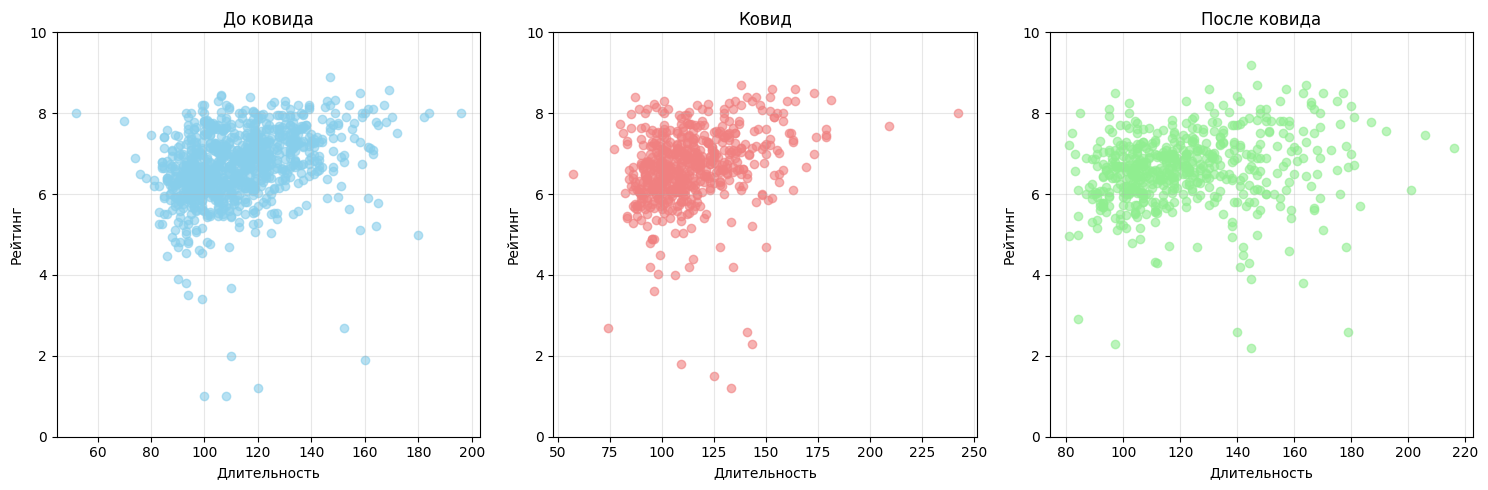

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
period_data = data[data['period'] == '2016-2019']
plt.scatter(period_data['duration'], period_data['rating'], alpha=0.6, color='skyblue')
plt.title('До ковида')
plt.xlabel('Длительность')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.subplot(1, 3, 2)
period_data = data[data['period'] == '2020-2021']
plt.scatter(period_data['duration'], period_data['rating'], alpha=0.6, color='lightcoral')
plt.title('Ковид')
plt.xlabel('Длительность')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.subplot(1, 3, 3)
period_data = data[data['period'] == '2022-2024']
plt.scatter(period_data['duration'], period_data['rating'], alpha=0.6, color='lightgreen')
plt.title('После ковида')
plt.xlabel('Длительность')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4288663747.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4288663747.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4288663747.py:22: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



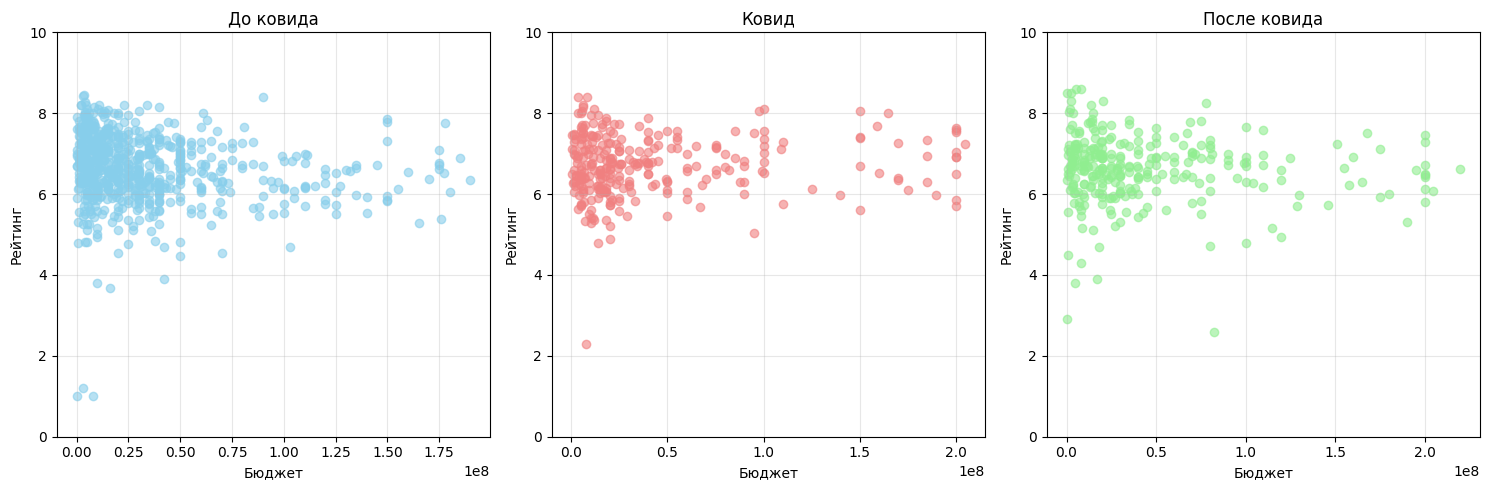

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
period_data = data_filtered[data['period'] == '2016-2019']
plt.scatter(period_data['budget'], period_data['rating'], alpha=0.6, color='skyblue')
plt.title('До ковида')
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.subplot(1, 3, 2)
period_data = data_filtered[data['period'] == '2020-2021']
plt.scatter(period_data['budget'], period_data['rating'], alpha=0.6, color='lightcoral')
plt.title('Ковид')
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.subplot(1, 3, 3)
period_data = data_filtered[data['period'] == '2022-2024']
plt.scatter(period_data['budget'], period_data['rating'], alpha=0.6, color='lightgreen')
plt.title('После ковида')
plt.xlabel('Бюджет')
plt.ylabel('Рейтинг')
plt.grid(alpha=0.3)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

**Анализ фильмов из России**

In [ ]:
russian_movies = data[data['country'].str.contains('Russia')]
print(f"Количество фильмов из России в датасете: {len(russian_movies)}")

Количество фильмов из России в датасете: 27


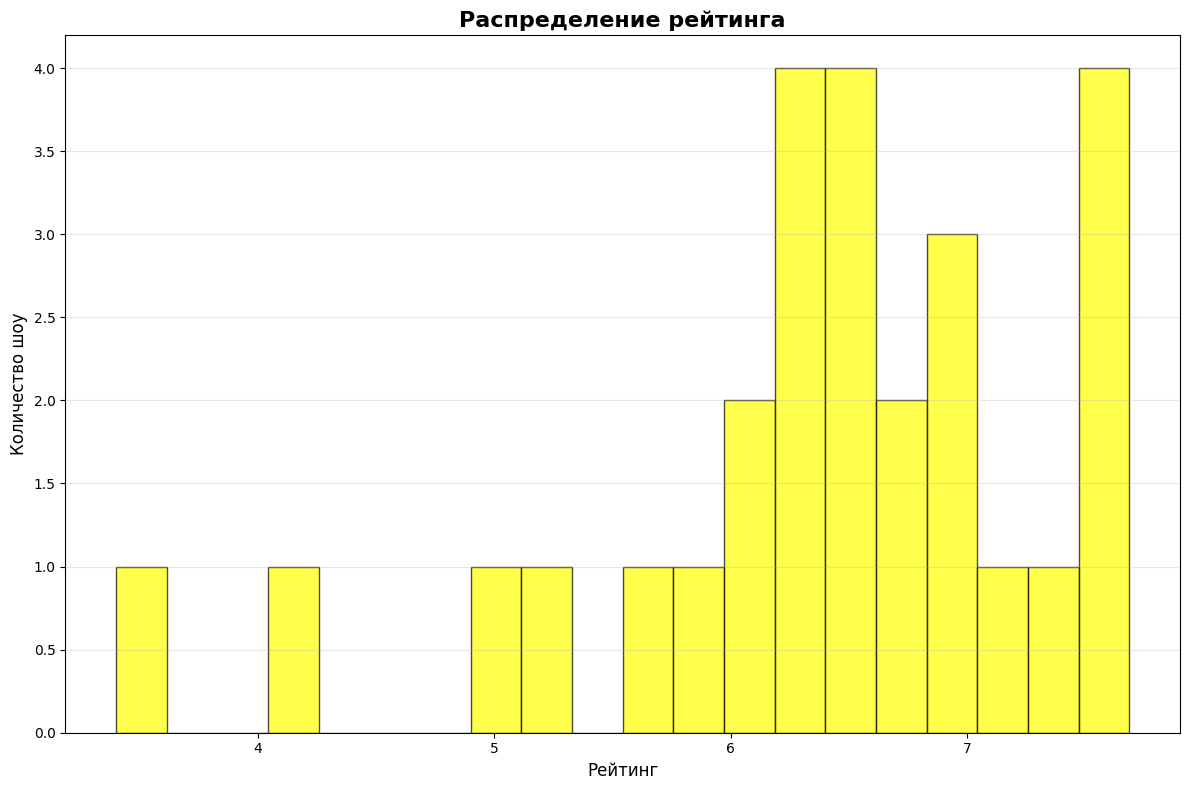

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(russian_movies['rating'], bins=20, edgecolor='black', alpha=0.7, color='#FFFF00')
plt.title('Распределение рейтинга', fontsize=16, fontweight='bold')
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

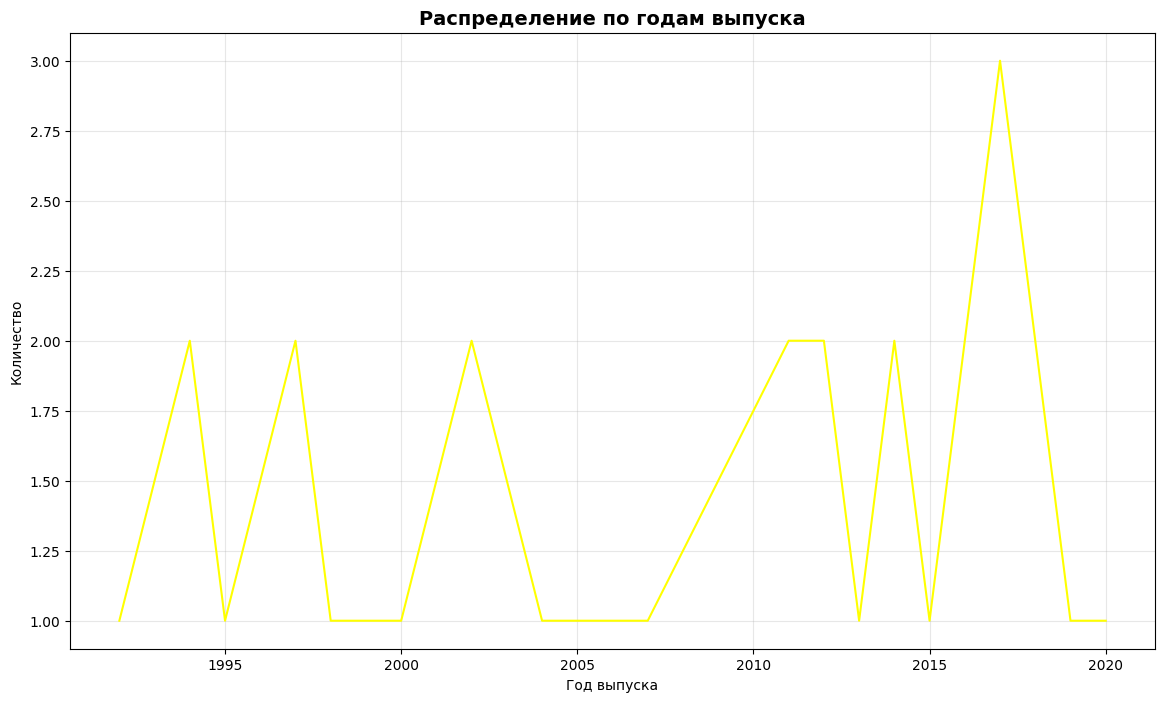

In [ ]:
year_counts = russian_movies['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']
plt.figure(figsize=(14,8))
sns.lineplot(data=year_counts, x='year', y='count', color='#FFFF00')
plt.title('Распределение по годам выпуска', fontsize=14, fontweight='bold')
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

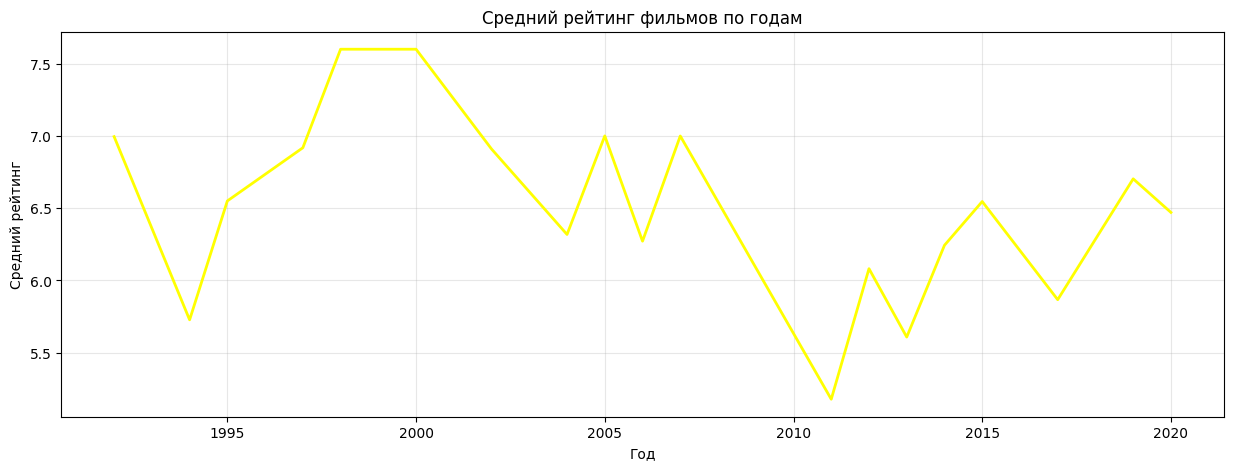

In [ ]:
plt.figure(figsize=(15, 5))
yearly_rating = russian_movies.groupby('year')['rating'].mean()
plt.plot(yearly_rating.index, yearly_rating.values, linewidth=2, color='#FFFF00')
plt.title('Средний рейтинг фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг')
plt.grid(True, alpha=0.3)

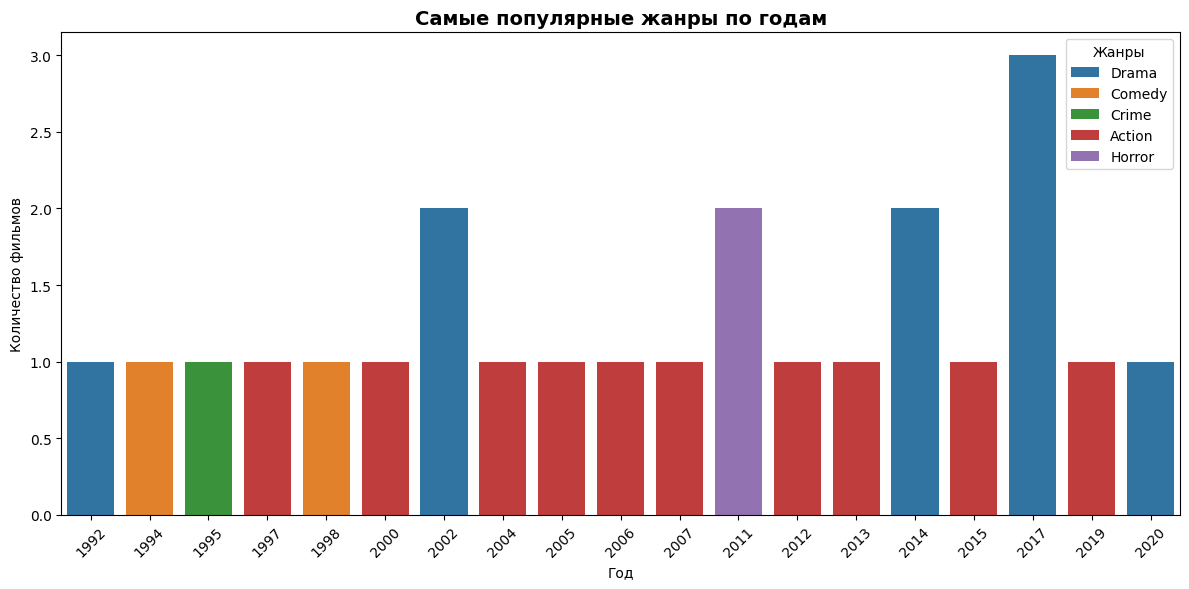

In [ ]:
unique_genres =  russian_movies.assign(genres=russian_movies['genres'].str.split(', ')).explode('genres')
genre_by_year = unique_genres.groupby(['year', 'genres']).size().reset_index(name='count')
top_genre_by_year = genre_by_year.loc[genre_by_year.groupby('year')['count'].idxmax()]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genre_by_year, x='year', y='count', hue='genres', dodge=False)
plt.title('Самые популярные жанры по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend(title='Жанры')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
animation_profit = data[data['genres'].str.contains('Animation', na=False)]['profit_percent'].mean()
print(f"Средняя прибыль для жанра Анимация: {animation_profit:.2f}%")

Средняя прибыль для жанра Анимация: 339.63%


In [ ]:
data['profit_percent'] = (data['revenue'] - data['budget']) / data['budget'] * 100
genres_profit_df = data['genres'].str.split(', ').explode().to_frame(name='genre')
genres_profit_df['profit_percent'] = data['profit_percent']
profit_by_genre = genres_profit_df.groupby('genre')['profit_percent'].mean().sort_values(ascending=False)
profit_by_genre_filtered = profit_by_genre[profit_by_genre < 1000]

fig = px.bar(
    profit_by_genre_filtered,
    x=profit_by_genre_filtered.index,
    y='profit_percent',
    title='Средняя прибыль в процентах по жанрам (прибыль < 1000%)',
    labels={'profit_percent': 'Прибыль (%)', 'index': 'Жанр'}
)

fig.show()